In [1]:
# Set path and check whether the requirement files are available
import os
from pathlib import Path

# If you using Google colab, uncomment this code
# from google.colab import drive
# drive.mount('/content/drive')
# project_path=Path('/content/drive/MyDrive/xxx/xxx')


# project_path=Path('')

# Else, use this. 
# project_path=Path('your path')
# os.chdir(project_path)
# print(f"✅ Current directory: {os.getcwd()}")
# print(f"\n📁 Files in directory:")
# # 
# required_dirs = ['datasets', 'models', 'utils', 'scripts']
# for dir_name in required_dirs:
#     if (project_path / dir_name).exists():
#         print(f"✅ {dir_name}/ found")
#     else:
#         print(f"❌ {dir_name}/ missing!")

In [2]:
# Installing requirement packages
# !pip -q install torch torchvision
# !pip -q install e2cnn
# !pip -q install matplotlib seaborn
# !pip -q install scikit-learn
# !pip -q install tensorboard
# !pip -q install pillow
# !pip install -q tqdm

In [2]:
# Import all required packages
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Import project modules
from config import Config
from datasets.unified_rotated_dataset import UnifiedRotatedDataset
from datasets.mixed_dataset import MixedDataset, get_dataloaders
from models.baseline_cnn import SimpleBaselineCNN
from models.steerable_cnn import SimpleSteerableCNN
from utils.trainer import Trainer
from utils.cross_dataset_test import (
    cross_dataset_evaluation,
    cross_dataset_evaluation_single_trained,
    compare_models_cross_dataset,
    print_cross_dataset_results
)
from utils.visualization import compare_two_models
from utils.evaluate_model_fn import evaluate_model
from scripts.download_dtd import download_dtd
from scripts.download_kth_tips import download_kth_tips
from scripts.download_cifar10 import download_cifar10
from scripts.explore_all_datasets_final import visualize_all_datasets_final
from utils.evaluate_model_fn import evaluate_model

print("✅ All packages imported")

✅ All packages imported


/home/zzijian/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Download DTD dataset
# from scripts.download_dtd import download_dtd
download_dtd()

✅ DTD dataset already exist


In [ ]:
# Download Kth-tips dataset
# from scripts.download_kth_tips import download_kth_tips
download_kth_tips()

✅ KTH-TIPS dataset already exist


In [6]:
# Download Cifar10 dataset
# from scripts.download_cifar10 import download_cifar10
download_cifar10()

⏬ Downloading CIFAR-10 dataset...
✅ CIFAR-10 downloaded!
📊 Training set: 50000 images
📊 Test set: 10000 images
🏷️  Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test)

📊 Loading DTD...
📊 Loading KTH-TIPS...
✅ Found 10 number of KTH class
   Classes: ['aluminium_foil', 'brown_bread', 'corduroy']...
📊 Loading CIFAR-10...

✅ Saved all_datasets_comparison_final.png

📊 Three datasets statistics comparison
Dataset         Type                 Resolution      Classes   
----------------------------------------------------------------------
DTD             Color Textures       Variable (high) 47        
KTH-TIPS        Gray Textures        200×200         10        
CIFAR-10        Natural Objects      32×32 (low)     10        

📷 Number of image:
  DTD:        5640 images
  KTH-TIPS:    810 images
  CIFAR-10 after subsampled:   5000 images
  Total:      11450 images

💡 Dataset characteristic:
  • DTD: High-resolution color textures with diverse categories
  • KTH-TIPS: Gray-scale texture, varying illumination or scale
  • CIFAR-10: Low-resolution natural objects, classic benchmark dataset


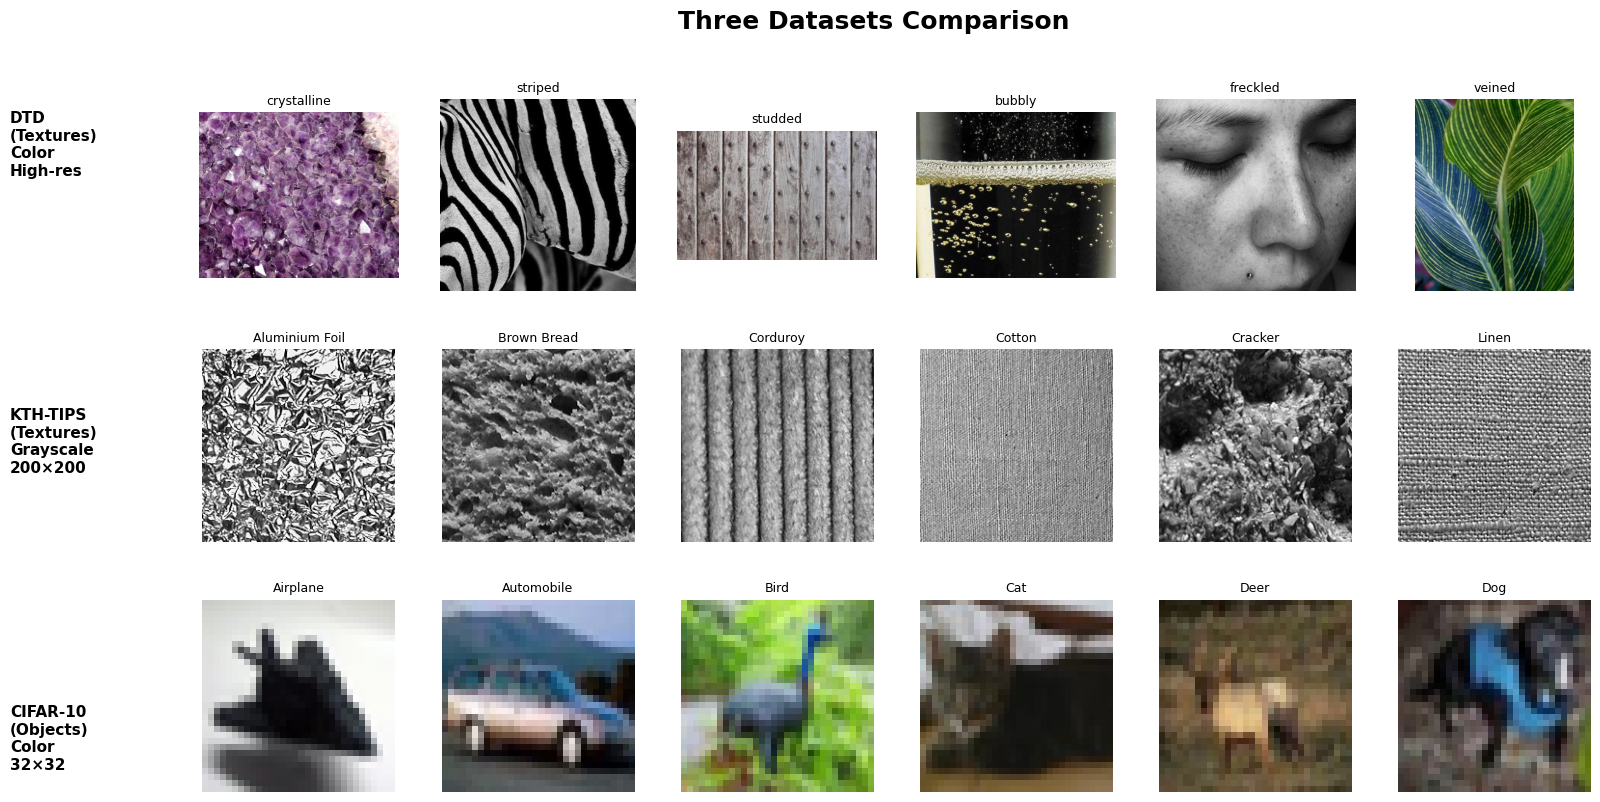

In [ ]:
# Visualize all three datasets
# from scripts.explore_all_datasets_final import visualize_all_datasets_final

visualize_all_datasets_final()

In [ ]:
# Test unified dataset loader
# from datasets.unified_rotated_dataset import UnifiedRotatedDataset

# Test DTD, print out the information
dtd_train = UnifiedRotatedDataset('dtd', 'train', img_size=128)
print(f"✅ DTD: {len(dtd_train)} train images, {dtd_train.get_num_classes()} classes\n")

dtd_val = UnifiedRotatedDataset('dtd', 'val', img_size=128)
print(f"✅ DTD: {len(dtd_val)} validation images, {dtd_val.get_num_classes()} classes\n")

dtd_test = UnifiedRotatedDataset('dtd', 'test', img_size=128)
print(f"✅ DTD: {len(dtd_test)} test images, {dtd_test.get_num_classes()} classes\n")

# Test KTH, print out the information
kth_train = UnifiedRotatedDataset('kth', 'train', img_size=128)
print(f"✅ KTH: {len(kth_train)} train images, {kth_train.get_num_classes()} classes\n")

kth_val = UnifiedRotatedDataset('kth', 'val', img_size=128)
print(f"✅ KTH: {len(kth_val)} validation images, {kth_val.get_num_classes()} classes\n")

kth_test = UnifiedRotatedDataset('kth', 'test', img_size=128)
print(f"✅ KTH: {len(kth_test)} test images, {kth_test.get_num_classes()} classes\n")

# Test CIFAR-10, print out the information
cifar_train = UnifiedRotatedDataset('cifar10', 'train', img_size=128)
print(f"✅ CIFAR-10: {len(cifar_train)} train images, {cifar_train.get_num_classes()} classes\n")

cifar_val = UnifiedRotatedDataset('cifar10', 'val', img_size=128)
print(f"✅ CIFAR-10: {len(cifar_val)} validation images, {cifar_val.get_num_classes()} classes\n")

cifar_test = UnifiedRotatedDataset('cifar10', 'test', img_size=128)
print(f"✅ CIFAR-10: {len(cifar_test)} test images, {cifar_test.get_num_classes()} classes\n")

# See the image size
img, label = dtd_train[0]
print(f"\n📦 Image size: {img.shape}")

✅ DTD train finish loading: 3947 images
✅ DTD: 3947 train images, 47 classes

✅ DTD val finish loading: 846 images
✅ DTD: 846 validation images, 47 classes

✅ DTD test finish loading: 847 images
✅ DTD: 847 test images, 47 classes

✅ KTH train finish loading: 567 images
✅ KTH: 567 train images, 10 classes

✅ KTH val finish loading: 121 images
✅ KTH: 121 validation images, 10 classes

✅ KTH test finish loading: 122 images
✅ KTH: 122 test images, 10 classes

✅ CIFAR10 train finish loading: 4250 images
✅ CIFAR-10: 4250 train images, 10 classe

✅ CIFAR10 val finish loading: 1000 images
✅ CIFAR-10: 1000 validation images, 10 classe

✅ CIFAR10 test finish loading: 1000 images
✅ CIFAR-10: 1000 test images, 10 classe


📦 Image size: torch.Size([3, 128, 128])


In [ ]:
# Loading Config files
# from config import Config

Config.setup_directories()
Config.print_config()

✅ Configuration loaded
📍 Device: cuda
🖼️  Image size: 128x128
📦 Batch size: 32
🔄 Epochs: 50

📊 Classes:
   DTD: 47
   KTH: 10
   CIFAR10: 10
   Mixed: 67


In [ ]:
# Loading Mixed dataset，make sure the output number image is same as the above in Test unified dataset loader section
# from datasets.mixed_dataset import get_dataloaders

train_loader, val_loader, test_loader = get_dataloaders(Config)
print(f"\n🧪 Checking a batch...")
images, labels = next(iter(train_loader))
print(f"📦 Batch images shape: {images.shape}")
print(f"🏷️  Batch labels shape: {labels.shape}")
print(f"🔍 Label range in this batch: {labels.min().item()} - {labels.max().item()}")

🔄 Creating DataLoaders...
🔄 Loading train dataset's three subsets...
✅ DTD train finish loading: 3947 images
✅ KTH train finish loading: 567 images
✅ CIFAR10 train finish loading: 4250 images
✅ Mixed finished (train): Total 8764 images
   Structure: DTD(3947) + KTH(567) + CIFAR10(4250)
🔄 Loading val dataset's three subsets...
✅ DTD val finish loading: 846 images
✅ KTH val finish loading: 121 images
✅ CIFAR10 val finish loading: 1000 images
✅ Mixed finished (val): Total 1967 images
   Structure: DTD(846) + KTH(121) + CIFAR10(1000)
🔄 Loading test dataset's three subsets...
✅ DTD test finish loading: 847 images
✅ KTH test finish loading: 122 images
✅ CIFAR10 test finish loading: 1000 images
✅ Mixed finished (test): Total 1969 images
   Structure: DTD(847) + KTH(122) + CIFAR10(1000)

✅ Datasets loading finished！
📊 Training set: 8764 images
📊 Validation set: 1967 images
📊 Testing set: 1969 images
🏷️  Total classes: 67
   (DTD: 3947 + KTH: 567 + CIFAR: 4250)

🧪 Checking a batch...
📦 Batch im

In [ ]:
# Load cross_dataset_test.py, click another time if the first time run is not succeed
from utils.cross_dataset_test import (
    cross_dataset_evaluation,
    print_cross_dataset_results,
    compare_models_cross_dataset,
    cross_dataset_evaluation_single_trained
)
print("✅ Cross-dataset evaluation functions loaded!")

✅ Cross-dataset evaluation functions loaded!


In [ ]:
# Load Trainer
from utils.trainer import Trainer
print("✅ Trainer loaded!")

✅ Trainer loaded!


In [ ]:
# Load baseline model and train it
# from models.baseline_cnn import SimpleBaselineCNN
# import torch

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

# Create model
baseline_model = SimpleBaselineCNN(num_classes=Config.mixed_num_classes)
baseline_model = baseline_model.to(Config.device)

print(f"📊 Parameters: {baseline_model.count_parameters():,}")

# Create trainer
baseline_trainer = Trainer(baseline_model, train_loader, val_loader, Config)

# Train
baseline_history = baseline_trainer.train()

# Save checkpoint
baseline_trainer.save_checkpoint(f"{Config.checkpoint_dir}/baseline_mixed.pth")

✅ SimpleBaselineCNN initialization finished
   Output classes: 67
📊 Parameters: 2,212,547
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 3.4772 | Train Acc: 9.57%
Val Loss:   3.6094 | Val Acc:   11.49%
Learning Rate: 0.001000
✅ Best model: 11.49%

Epoch 2/50
------------------------------------------------------------


Train Loss: 3.1368 | Train Acc: 13.90%
Val Loss:   3.9036 | Val Acc:   13.37%
Learning Rate: 0.001000
✅ Best model: 13.37%

Epoch 3/50
------------------------------------------------------------


Train Loss: 3.0099 | Train Acc: 15.43%
Val Loss:   3.7636 | Val Acc:   14.90%
Learning Rate: 0.001000
✅ Best model: 14.90%

Epoch 4/50
------------------------------------------------------------


Train Loss: 2.9380 | Train Acc: 16.28%
Val Loss:   3.6536 | Val Acc:   17.79%
Learning Rate: 0.001000
✅ Best model: 17.79%

Epoch 5/50
------------------------------------------------------------


Train Loss: 2.8836 | Train Acc: 18.18%
Val Loss:   3.7905 | Val Acc:   20.03%
Learning Rate: 0.001000
✅ Best model: 20.03%

Epoch 6/50
------------------------------------------------------------


Train Loss: 2.8416 | Train Acc: 18.51%
Val Loss:   3.8845 | Val Acc:   19.57%
Learning Rate: 0.001000

Epoch 7/50
------------------------------------------------------------


Train Loss: 2.8314 | Train Acc: 18.52%
Val Loss:   3.7295 | Val Acc:   21.76%
Learning Rate: 0.001000
✅ Best model: 21.76%

Epoch 8/50
------------------------------------------------------------


Train Loss: 2.7925 | Train Acc: 20.03%
Val Loss:   3.6904 | Val Acc:   20.03%
Learning Rate: 0.001000

Epoch 9/50
------------------------------------------------------------


Train Loss: 2.7835 | Train Acc: 19.57%
Val Loss:   3.7506 | Val Acc:   22.17%
Learning Rate: 0.001000
✅ Best model: 22.17%

Epoch 10/50
------------------------------------------------------------


Train Loss: 2.7604 | Train Acc: 20.39%
Val Loss:   3.5229 | Val Acc:   23.39%
Learning Rate: 0.001000
✅ Best model: 23.39%

Epoch 11/50
------------------------------------------------------------


Train Loss: 2.7338 | Train Acc: 20.87%
Val Loss:   3.6195 | Val Acc:   22.17%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


Train Loss: 2.7035 | Train Acc: 21.46%
Val Loss:   3.6488 | Val Acc:   23.23%
Learning Rate: 0.001000

Epoch 13/50
------------------------------------------------------------


Train Loss: 2.7066 | Train Acc: 21.43%
Val Loss:   3.5674 | Val Acc:   24.66%
Learning Rate: 0.001000
✅ Best model: 24.66%

Epoch 14/50
------------------------------------------------------------


Train Loss: 2.6719 | Train Acc: 21.93%
Val Loss:   3.5542 | Val Acc:   21.91%
Learning Rate: 0.001000

Epoch 15/50
------------------------------------------------------------


Train Loss: 2.6743 | Train Acc: 21.66%
Val Loss:   3.6060 | Val Acc:   24.40%
Learning Rate: 0.001000

Epoch 16/50
------------------------------------------------------------


Train Loss: 2.6505 | Train Acc: 23.14%
Val Loss:   3.7068 | Val Acc:   24.25%
Learning Rate: 0.001000

Epoch 17/50
------------------------------------------------------------


Train Loss: 2.6146 | Train Acc: 23.92%
Val Loss:   3.7360 | Val Acc:   26.39%
Learning Rate: 0.001000
✅ Best model: 26.39%

Epoch 18/50
------------------------------------------------------------


Train Loss: 2.6096 | Train Acc: 23.78%
Val Loss:   3.3398 | Val Acc:   26.54%
Learning Rate: 0.001000
✅ Best model: 26.54%

Epoch 19/50
------------------------------------------------------------


Train Loss: 2.6063 | Train Acc: 23.68%
Val Loss:   3.3425 | Val Acc:   26.08%
Learning Rate: 0.001000

Epoch 20/50
------------------------------------------------------------


Train Loss: 2.5787 | Train Acc: 24.75%
Val Loss:   3.5534 | Val Acc:   26.94%
Learning Rate: 0.001000
✅ Best model: 26.94%

Epoch 21/50
------------------------------------------------------------


Train Loss: 2.5764 | Train Acc: 24.38%
Val Loss:   3.4581 | Val Acc:   26.79%
Learning Rate: 0.001000

Epoch 22/50
------------------------------------------------------------


Train Loss: 2.5551 | Train Acc: 24.73%
Val Loss:   3.5339 | Val Acc:   26.49%
Learning Rate: 0.001000

Epoch 23/50
------------------------------------------------------------


Train Loss: 2.5152 | Train Acc: 25.68%
Val Loss:   3.6205 | Val Acc:   27.91%
Learning Rate: 0.001000
✅ Best model: 27.91%

Epoch 24/50
------------------------------------------------------------


Train Loss: 2.5146 | Train Acc: 25.95%
Val Loss:   3.4612 | Val Acc:   28.67%
Learning Rate: 0.001000
✅ Best model: 28.67%

Epoch 25/50
------------------------------------------------------------


Train Loss: 2.5043 | Train Acc: 26.91%
Val Loss:   3.5577 | Val Acc:   27.76%
Learning Rate: 0.001000

Epoch 26/50
------------------------------------------------------------


Train Loss: 2.5206 | Train Acc: 26.49%
Val Loss:   3.5856 | Val Acc:   28.98%
Learning Rate: 0.001000
✅ Best model: 28.98%

Epoch 27/50
------------------------------------------------------------


Train Loss: 2.4771 | Train Acc: 27.58%
Val Loss:   3.4836 | Val Acc:   29.79%
Learning Rate: 0.001000
✅ Best model: 29.79%

Epoch 28/50
------------------------------------------------------------


Train Loss: 2.4718 | Train Acc: 26.94%
Val Loss:   3.4867 | Val Acc:   30.81%
Learning Rate: 0.001000
✅ Best model: 30.81%

Epoch 29/50
------------------------------------------------------------


Train Loss: 2.4452 | Train Acc: 27.40%
Val Loss:   3.4767 | Val Acc:   27.61%
Learning Rate: 0.001000

Epoch 30/50
------------------------------------------------------------


Train Loss: 2.4587 | Train Acc: 27.62%
Val Loss:   3.4454 | Val Acc:   28.42%
Learning Rate: 0.001000

Epoch 31/50
------------------------------------------------------------


Train Loss: 2.4446 | Train Acc: 27.61%
Val Loss:   3.4811 | Val Acc:   29.99%
Learning Rate: 0.001000

Epoch 32/50
------------------------------------------------------------


Train Loss: 2.4239 | Train Acc: 28.40%
Val Loss:   3.5320 | Val Acc:   31.37%
Learning Rate: 0.001000
✅ Best model: 31.37%

Epoch 33/50
------------------------------------------------------------


Train Loss: 2.4079 | Train Acc: 28.43%
Val Loss:   3.5890 | Val Acc:   28.93%
Learning Rate: 0.001000

Epoch 34/50
------------------------------------------------------------


Train Loss: 2.3989 | Train Acc: 28.70%
Val Loss:   3.3796 | Val Acc:   31.72%
Learning Rate: 0.001000
✅ Best model: 31.72%

Epoch 35/50
------------------------------------------------------------


Train Loss: 2.3914 | Train Acc: 28.78%
Val Loss:   3.5372 | Val Acc:   31.42%
Learning Rate: 0.001000

Epoch 36/50
------------------------------------------------------------


Train Loss: 2.3788 | Train Acc: 29.36%
Val Loss:   3.4072 | Val Acc:   28.06%
Learning Rate: 0.001000

Epoch 37/50
------------------------------------------------------------


Train Loss: 2.3459 | Train Acc: 30.44%
Val Loss:   3.5454 | Val Acc:   31.42%
Learning Rate: 0.001000

Epoch 38/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 2.3672 | Train Acc: 29.90%
Val Loss:   3.6768 | Val Acc:   29.54%
Learning Rate: 0.000500

Epoch 39/50
------------------------------------------------------------


Train Loss: 2.2793 | Train Acc: 32.20%
Val Loss:   3.3942 | Val Acc:   34.27%
Learning Rate: 0.000500
✅ Best model: 34.27%

Epoch 40/50
------------------------------------------------------------


Train Loss: 2.2590 | Train Acc: 32.61%
Val Loss:   3.2855 | Val Acc:   34.06%
Learning Rate: 0.000500

Epoch 41/50
------------------------------------------------------------


Train Loss: 2.2468 | Train Acc: 32.67%
Val Loss:   3.4670 | Val Acc:   33.20%
Learning Rate: 0.000500

Epoch 42/50
------------------------------------------------------------


Train Loss: 2.2334 | Train Acc: 33.24%
Val Loss:   3.2450 | Val Acc:   34.52%
Learning Rate: 0.000500
✅ Best model: 34.52%

Epoch 43/50
------------------------------------------------------------


Train Loss: 2.2319 | Train Acc: 33.14%
Val Loss:   3.3597 | Val Acc:   33.81%
Learning Rate: 0.000500

Epoch 44/50
------------------------------------------------------------


Train Loss: 2.2149 | Train Acc: 33.98%
Val Loss:   3.2684 | Val Acc:   36.15%
Learning Rate: 0.000500
✅ Best model: 36.15%

Epoch 45/50
------------------------------------------------------------


Train Loss: 2.1935 | Train Acc: 34.57%
Val Loss:   3.2363 | Val Acc:   37.11%
Learning Rate: 0.000500
✅ Best model: 37.11%

Epoch 46/50
------------------------------------------------------------


Train Loss: 2.1749 | Train Acc: 34.29%
Val Loss:   3.1327 | Val Acc:   35.64%
Learning Rate: 0.000500

Epoch 47/50
------------------------------------------------------------


Train Loss: 2.1596 | Train Acc: 34.80%
Val Loss:   3.0842 | Val Acc:   37.11%
Learning Rate: 0.000500

Epoch 48/50
------------------------------------------------------------


Train Loss: 2.1427 | Train Acc: 35.66%
Val Loss:   3.2720 | Val Acc:   35.49%
Learning Rate: 0.000500

Epoch 49/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 2.1451 | Train Acc: 36.46%
Val Loss:   3.1900 | Val Acc:   36.60%
Learning Rate: 0.000250

Epoch 50/50
------------------------------------------------------------


Train Loss: 2.0761 | Train Acc: 37.30%
Val Loss:   3.0896 | Val Acc:   38.38%
Learning Rate: 0.000250
✅ Best model: 38.38%

✅ Training finished！
⏱️  Total time: 27.6 minutes
🏆 Best validation accuracy: 38.38%
💾 Model saved at: ./checkpoints/baseline_mixed.pth


In [ ]:
# Load Steerable CNN and train it
# Load and train Steerable CNN
# from models.steerable_cnn import SimpleSteerableCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

# Create model
steerable_model = SimpleSteerableCNN(num_classes=Config.mixed_num_classes, N=8)
steerable_model = steerable_model.to(Config.device)

print(f"📊 Parameters: {steerable_model.count_parameters():,}")

# Create trainer
steerable_trainer = Trainer(steerable_model, train_loader, val_loader, Config)

# Train
steerable_history = steerable_trainer.train()

# Save checkpoint
steerable_trainer.save_checkpoint(f"{Config.checkpoint_dir}/steerable_mixed.pth")

/home/zzijian/.conda/envs/Math559project/lib/python3.10/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:80: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /pytorch/aten/src/ATen/native/IndexingUtils.h:29.)
  full_mask[mask] = norms.to(torch.uint8)


✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 67
   Eqivariance: SO(2) continuous rotation
📊 Parameters: 2,631,491
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 3.5064 | Train Acc: 10.39%
Val Loss:   4.1353 | Val Acc:   14.79%
Learning Rate: 0.001000
✅ Best model: 14.79%

Epoch 2/50
------------------------------------------------------------


Train Loss: 3.0093 | Train Acc: 14.61%
Val Loss:   4.1765 | Val Acc:   15.71%
Learning Rate: 0.001000
✅ Best model: 15.71%

Epoch 3/50
------------------------------------------------------------


Train Loss: 2.8970 | Train Acc: 17.33%
Val Loss:   3.9185 | Val Acc:   17.54%
Learning Rate: 0.001000
✅ Best model: 17.54%

Epoch 4/50
------------------------------------------------------------


Train Loss: 2.8343 | Train Acc: 18.36%
Val Loss:   4.3898 | Val Acc:   19.88%
Learning Rate: 0.001000
✅ Best model: 19.88%

Epoch 5/50
------------------------------------------------------------


Train Loss: 2.8019 | Train Acc: 18.82%
Val Loss:   4.2859 | Val Acc:   19.01%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 2.7465 | Train Acc: 19.47%
Val Loss:   3.8667 | Val Acc:   23.34%
Learning Rate: 0.001000
✅ Best model: 23.34%

Epoch 7/50
------------------------------------------------------------


Train Loss: 2.7021 | Train Acc: 20.10%
Val Loss:   4.2132 | Val Acc:   19.67%
Learning Rate: 0.001000

Epoch 8/50
------------------------------------------------------------


Train Loss: 2.6704 | Train Acc: 21.30%
Val Loss:   3.6498 | Val Acc:   24.30%
Learning Rate: 0.001000
✅ Best model: 24.30%

Epoch 9/50
------------------------------------------------------------


Train Loss: 2.6298 | Train Acc: 22.44%
Val Loss:   3.9145 | Val Acc:   23.49%
Learning Rate: 0.001000

Epoch 10/50
------------------------------------------------------------


Train Loss: 2.5940 | Train Acc: 23.70%
Val Loss:   3.6780 | Val Acc:   26.49%
Learning Rate: 0.001000
✅ Best model: 26.49%

Epoch 11/50
------------------------------------------------------------


Train Loss: 2.5446 | Train Acc: 24.65%
Val Loss:   3.6908 | Val Acc:   24.76%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


Train Loss: 2.5067 | Train Acc: 25.27%
Val Loss:   3.5199 | Val Acc:   27.96%
Learning Rate: 0.001000
✅ Best model: 27.96%

Epoch 13/50
------------------------------------------------------------


Train Loss: 2.4718 | Train Acc: 26.23%
Val Loss:   3.7985 | Val Acc:   28.62%
Learning Rate: 0.001000
✅ Best model: 28.62%

Epoch 14/50
------------------------------------------------------------


Train Loss: 2.4257 | Train Acc: 26.94%
Val Loss:   3.5454 | Val Acc:   31.11%
Learning Rate: 0.001000
✅ Best model: 31.11%

Epoch 15/50
------------------------------------------------------------


Train Loss: 2.3721 | Train Acc: 28.99%
Val Loss:   3.6359 | Val Acc:   32.79%
Learning Rate: 0.001000
✅ Best model: 32.79%

Epoch 16/50
------------------------------------------------------------


Train Loss: 2.3315 | Train Acc: 29.42%
Val Loss:   3.4804 | Val Acc:   33.55%
Learning Rate: 0.001000
✅ Best model: 33.55%

Epoch 17/50
------------------------------------------------------------


Train Loss: 2.2923 | Train Acc: 30.01%
Val Loss:   3.5456 | Val Acc:   33.25%
Learning Rate: 0.001000

Epoch 18/50
------------------------------------------------------------


Train Loss: 2.2682 | Train Acc: 30.45%
Val Loss:   3.4881 | Val Acc:   31.52%
Learning Rate: 0.001000

Epoch 19/50
------------------------------------------------------------


Train Loss: 2.2213 | Train Acc: 32.27%
Val Loss:   3.1620 | Val Acc:   36.10%
Learning Rate: 0.001000
✅ Best model: 36.10%

Epoch 20/50
------------------------------------------------------------


Train Loss: 2.1950 | Train Acc: 32.79%
Val Loss:   3.3310 | Val Acc:   37.67%
Learning Rate: 0.001000
✅ Best model: 37.67%

Epoch 21/50
------------------------------------------------------------


Train Loss: 2.1693 | Train Acc: 33.02%
Val Loss:   3.3448 | Val Acc:   37.37%
Learning Rate: 0.001000

Epoch 22/50
------------------------------------------------------------


Train Loss: 2.1265 | Train Acc: 34.14%
Val Loss:   3.1540 | Val Acc:   39.40%
Learning Rate: 0.001000
✅ Best model: 39.40%

Epoch 23/50
------------------------------------------------------------


Train Loss: 2.0902 | Train Acc: 35.81%
Val Loss:   3.5108 | Val Acc:   38.49%
Learning Rate: 0.001000

Epoch 24/50
------------------------------------------------------------


Train Loss: 2.0910 | Train Acc: 35.29%
Val Loss:   3.1619 | Val Acc:   40.82%
Learning Rate: 0.001000
✅ Best model: 40.82%

Epoch 25/50
------------------------------------------------------------


Train Loss: 2.0522 | Train Acc: 35.99%
Val Loss:   3.4984 | Val Acc:   40.11%
Learning Rate: 0.001000

Epoch 26/50
------------------------------------------------------------


Train Loss: 2.0490 | Train Acc: 36.28%
Val Loss:   3.2267 | Val Acc:   39.30%
Learning Rate: 0.001000

Epoch 27/50
------------------------------------------------------------


Train Loss: 2.0264 | Train Acc: 37.22%
Val Loss:   3.3721 | Val Acc:   37.67%
Learning Rate: 0.001000

Epoch 28/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 2.0271 | Train Acc: 36.78%
Val Loss:   3.3305 | Val Acc:   39.71%
Learning Rate: 0.000500

Epoch 29/50
------------------------------------------------------------


Train Loss: 1.8896 | Train Acc: 40.19%
Val Loss:   3.1655 | Val Acc:   42.91%
Learning Rate: 0.000500
✅ Best model: 42.91%

Epoch 30/50
------------------------------------------------------------


Train Loss: 1.8776 | Train Acc: 40.04%
Val Loss:   3.0062 | Val Acc:   44.13%
Learning Rate: 0.000500
✅ Best model: 44.13%

Epoch 31/50
------------------------------------------------------------


Train Loss: 1.8357 | Train Acc: 41.51%
Val Loss:   3.1855 | Val Acc:   45.75%
Learning Rate: 0.000500
✅ Best model: 45.75%

Epoch 32/50
------------------------------------------------------------


Train Loss: 1.8214 | Train Acc: 43.06%
Val Loss:   3.0390 | Val Acc:   44.48%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


Train Loss: 1.7915 | Train Acc: 42.32%
Val Loss:   2.9921 | Val Acc:   44.69%
Learning Rate: 0.000500

Epoch 34/50
------------------------------------------------------------


Train Loss: 1.7937 | Train Acc: 43.12%
Val Loss:   2.9467 | Val Acc:   46.16%
Learning Rate: 0.000500
✅ Best model: 46.16%

Epoch 35/50
------------------------------------------------------------


Train Loss: 1.7668 | Train Acc: 43.82%
Val Loss:   2.9395 | Val Acc:   44.99%
Learning Rate: 0.000500

Epoch 36/50
------------------------------------------------------------


Train Loss: 1.7580 | Train Acc: 43.39%
Val Loss:   3.0265 | Val Acc:   46.77%
Learning Rate: 0.000500
✅ Best model: 46.77%

Epoch 37/50
------------------------------------------------------------


Train Loss: 1.7540 | Train Acc: 42.95%
Val Loss:   3.0262 | Val Acc:   46.82%
Learning Rate: 0.000500
✅ Best model: 46.82%

Epoch 38/50
------------------------------------------------------------


Train Loss: 1.7339 | Train Acc: 44.31%
Val Loss:   2.9225 | Val Acc:   46.42%
Learning Rate: 0.000500

Epoch 39/50
------------------------------------------------------------


Train Loss: 1.7106 | Train Acc: 44.90%
Val Loss:   3.1104 | Val Acc:   45.91%
Learning Rate: 0.000500

Epoch 40/50
------------------------------------------------------------


Train Loss: 1.7167 | Train Acc: 44.95%
Val Loss:   2.8185 | Val Acc:   47.03%
Learning Rate: 0.000500
✅ Best model: 47.03%

Epoch 41/50
------------------------------------------------------------


Train Loss: 1.6934 | Train Acc: 45.31%
Val Loss:   2.9455 | Val Acc:   45.96%
Learning Rate: 0.000500

Epoch 42/50
------------------------------------------------------------


Train Loss: 1.6849 | Train Acc: 46.34%
Val Loss:   3.2191 | Val Acc:   46.62%
Learning Rate: 0.000500

Epoch 43/50
------------------------------------------------------------


Train Loss: 1.6718 | Train Acc: 46.27%
Val Loss:   3.0733 | Val Acc:   47.79%
Learning Rate: 0.000500
✅ Best model: 47.79%

Epoch 44/50
------------------------------------------------------------


Train Loss: 1.6594 | Train Acc: 46.44%
Val Loss:   2.9929 | Val Acc:   46.72%
Learning Rate: 0.000500

Epoch 45/50
------------------------------------------------------------


Train Loss: 1.6409 | Train Acc: 47.08%
Val Loss:   2.9597 | Val Acc:   48.86%
Learning Rate: 0.000500
✅ Best model: 48.86%

Epoch 46/50
------------------------------------------------------------


Train Loss: 1.6456 | Train Acc: 47.11%
Val Loss:   2.9578 | Val Acc:   48.35%
Learning Rate: 0.000500

Epoch 47/50
------------------------------------------------------------


Train Loss: 1.6149 | Train Acc: 47.96%
Val Loss:   3.0394 | Val Acc:   46.06%
Learning Rate: 0.000500

Epoch 48/50
------------------------------------------------------------


Train Loss: 1.6182 | Train Acc: 47.62%
Val Loss:   2.9887 | Val Acc:   47.53%
Learning Rate: 0.000500

Epoch 49/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 1.6231 | Train Acc: 47.52%
Val Loss:   2.9501 | Val Acc:   47.33%
Learning Rate: 0.000250

Epoch 50/50
------------------------------------------------------------


Train Loss: 1.5271 | Train Acc: 50.51%
Val Loss:   3.0041 | Val Acc:   49.57%
Learning Rate: 0.000250
✅ Best model: 49.57%

✅ Training finished！
⏱️  Total time: 39.2 minutes
🏆 Best validation accuracy: 49.57%
💾 Model saved at: ./checkpoints/steerable_mixed.pth


In [ ]:
# Evaluate Mixed models
# import torch
# from models.baseline_cnn import SimpleBaselineCNN
# from models.steerable_cnn import SimpleSteerableCNN
# from utils.evaluate_model_fn import evaluate_model

# Load model architecture first, then load weights
torch.serialization.add_safe_globals([Config])

baseline_model = SimpleBaselineCNN(num_classes=Config.mixed_num_classes).to(Config.device)
checkpoint = torch.load("checkpoints/baseline_mixed.pth", map_location=Config.device)
baseline_model.load_state_dict(checkpoint['model_state_dict'])

steerable_model = SimpleSteerableCNN(num_classes=Config.mixed_num_classes, N=8).to(Config.device)
checkpoint = torch.load("checkpoints/steerable_mixed.pth", map_location=Config.device)
steerable_model.load_state_dict(checkpoint['model_state_dict'])

# Test on mixed test set
baseline_mixed_test_acc = evaluate_model(baseline_model, test_loader, Config)
steerable_mixed_test_acc = evaluate_model(steerable_model, test_loader, Config)

print(f"Baseline Mixed test: {baseline_mixed_test_acc:.2f}%")
print(f"Steerable Mixed test: {steerable_mixed_test_acc:.2f}%")

✅ SimpleBaselineCNN initialization finished
   Output classes: 67
✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 67
   Eqivariance: SO(2) continuous rotation
Baseline Mixed test: 37.94%
Steerable Mixed test: 50.63%


📊 Saved: results/baseline_vs_steerable.png

📊 Baseline CNN vs Steerable CNN
Metric                         Baseline CNN         Steerable CNN        Diff           
--------------------------------------------------------------------------------
Final Train Accuracy           37.30               % 50.51               % +13.21%
Final Val Accuracy             38.38               % 49.57               % +11.18%
Best Val Accuracy              38.38               % 49.57               % +11.18%
Test Accuracy                  37.94               % 50.63               % +12.70%


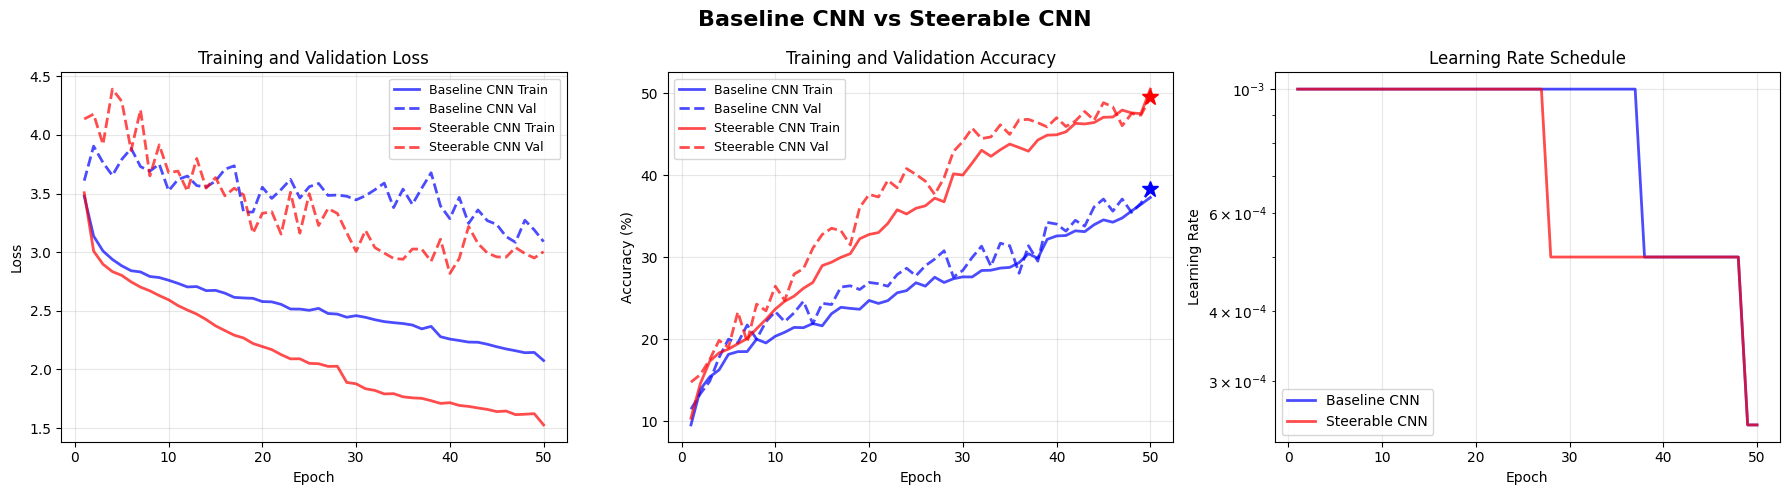

In [ ]:
# Comparsion with two models under trained on mixed dataset
# Compare Baseline vs Steerable
#  from utils.visualization import compare_two_models

# Load training histories
torch.serialization.add_safe_globals([Config])
baseline_checkpoint = torch.load("checkpoints/baseline_mixed.pth",map_location='cpu')
baseline_history = baseline_checkpoint['history']

steerable_checkpoint = torch.load("checkpoints/steerable_mixed.pth",map_location='cpu')
steerable_history = steerable_checkpoint['history']

compare_two_models(
    history1=baseline_history,
    history2=steerable_history,
    name1='Baseline CNN',
    name2='Steerable CNN',
    test_acc1=baseline_mixed_test_acc,  # Add if you test baseline on test set
    test_acc2=steerable_mixed_test_acc,  # Add if you test steerable on test set
    save_name='baseline_vs_steerable.png'
)

In [ ]:
# Train on DTD dataset only
# from datasets.unified_rotated_dataset import UnifiedRotatedDataset
# from torch.utils.data import DataLoader
# import torch

TRAIN_DATASET = 'dtd'

dtd_train = UnifiedRotatedDataset(TRAIN_DATASET, 'train', Config.img_size, Config.rotation_range, data_root=Config.data_root)
dtd_val = UnifiedRotatedDataset(TRAIN_DATASET, 'val', Config.img_size, Config.rotation_range, data_root=Config.data_root)

dtd_train_loader = DataLoader(dtd_train, Config.batch_size, shuffle=True, num_workers=Config.num_workers)
dtd_val_loader = DataLoader(dtd_val, Config.batch_size, shuffle=False, num_workers=Config.num_workers)

print(f"🏷️  DTD classes: {dtd_train.get_num_classes()}")

✅ DTD train finish loading: 3947 images
✅ DTD val finish loading: 846 images
🏷️  DTD classes: 47


In [ ]:
# Train Baseline CNN on DTD
# from models.baseline_cnn import SimpleBaselineCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

baseline_dtd = SimpleBaselineCNN(num_classes=dtd_train.get_num_classes()).to(Config.device)
print(f"📊 Parameters: {baseline_dtd.count_parameters():,}")

baseline_dtd_trainer = Trainer(baseline_dtd, dtd_train_loader, dtd_val_loader, Config)
baseline_dtd_history = baseline_dtd_trainer.train()
baseline_dtd_trainer.save_checkpoint(f"{Config.checkpoint_dir}/baseline_dtd.pth")

✅ SimpleBaselineCNN initialization finished
   Output classes: 47
📊 Parameters: 2,207,407
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 3.9138 | Train Acc: 3.78%
Val Loss:   3.7908 | Val Acc:   5.20%
Learning Rate: 0.001000
✅ Best model: 5.20%

Epoch 2/50
------------------------------------------------------------


Train Loss: 3.7634 | Train Acc: 4.86%
Val Loss:   3.7225 | Val Acc:   6.50%
Learning Rate: 0.001000
✅ Best model: 6.50%

Epoch 3/50
------------------------------------------------------------


Train Loss: 3.6967 | Train Acc: 6.26%
Val Loss:   3.6888 | Val Acc:   6.15%
Learning Rate: 0.001000

Epoch 4/50
------------------------------------------------------------


Train Loss: 3.6965 | Train Acc: 6.11%
Val Loss:   3.6893 | Val Acc:   6.50%
Learning Rate: 0.001000

Epoch 5/50
------------------------------------------------------------


Train Loss: 3.6357 | Train Acc: 6.76%
Val Loss:   3.6762 | Val Acc:   6.15%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 3.6462 | Train Acc: 7.63%
Val Loss:   3.6329 | Val Acc:   7.21%
Learning Rate: 0.001000
✅ Best model: 7.21%

Epoch 7/50
------------------------------------------------------------


Train Loss: 3.6282 | Train Acc: 7.45%
Val Loss:   3.6383 | Val Acc:   8.39%
Learning Rate: 0.001000
✅ Best model: 8.39%

Epoch 8/50
------------------------------------------------------------


Train Loss: 3.6167 | Train Acc: 7.73%
Val Loss:   3.6175 | Val Acc:   9.34%
Learning Rate: 0.001000
✅ Best model: 9.34%

Epoch 9/50
------------------------------------------------------------


Train Loss: 3.5854 | Train Acc: 8.54%
Val Loss:   3.5918 | Val Acc:   8.98%
Learning Rate: 0.001000

Epoch 10/50
------------------------------------------------------------


Train Loss: 3.5634 | Train Acc: 7.83%
Val Loss:   3.5591 | Val Acc:   10.05%
Learning Rate: 0.001000
✅ Best model: 10.05%

Epoch 11/50
------------------------------------------------------------


Train Loss: 3.5501 | Train Acc: 8.36%
Val Loss:   3.5525 | Val Acc:   9.22%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


Train Loss: 3.5153 | Train Acc: 9.30%
Val Loss:   3.4536 | Val Acc:   11.94%
Learning Rate: 0.001000
✅ Best model: 11.94%

Epoch 13/50
------------------------------------------------------------


Train Loss: 3.4871 | Train Acc: 9.60%
Val Loss:   3.5553 | Val Acc:   10.76%
Learning Rate: 0.001000

Epoch 14/50
------------------------------------------------------------


Train Loss: 3.4596 | Train Acc: 9.83%
Val Loss:   3.4102 | Val Acc:   11.47%
Learning Rate: 0.001000

Epoch 15/50
------------------------------------------------------------


Train Loss: 3.4486 | Train Acc: 10.46%
Val Loss:   3.4279 | Val Acc:   12.29%
Learning Rate: 0.001000
✅ Best model: 12.29%

Epoch 16/50
------------------------------------------------------------


Train Loss: 3.4363 | Train Acc: 10.29%
Val Loss:   3.4147 | Val Acc:   12.06%
Learning Rate: 0.001000

Epoch 17/50
------------------------------------------------------------


Train Loss: 3.4171 | Train Acc: 11.12%
Val Loss:   3.4017 | Val Acc:   13.59%
Learning Rate: 0.001000
✅ Best model: 13.59%

Epoch 18/50
------------------------------------------------------------


Train Loss: 3.3905 | Train Acc: 11.63%
Val Loss:   3.3543 | Val Acc:   13.95%
Learning Rate: 0.001000
✅ Best model: 13.95%

Epoch 19/50
------------------------------------------------------------


Train Loss: 3.3746 | Train Acc: 11.86%
Val Loss:   3.3898 | Val Acc:   13.12%
Learning Rate: 0.001000

Epoch 20/50
------------------------------------------------------------


Train Loss: 3.3744 | Train Acc: 11.30%
Val Loss:   3.3477 | Val Acc:   13.36%
Learning Rate: 0.001000

Epoch 21/50
------------------------------------------------------------


Train Loss: 3.3480 | Train Acc: 11.76%
Val Loss:   3.3090 | Val Acc:   14.66%
Learning Rate: 0.001000
✅ Best model: 14.66%

Epoch 22/50
------------------------------------------------------------


Train Loss: 3.3093 | Train Acc: 12.64%
Val Loss:   3.3535 | Val Acc:   16.08%
Learning Rate: 0.001000
✅ Best model: 16.08%

Epoch 23/50
------------------------------------------------------------


Train Loss: 3.3092 | Train Acc: 12.95%
Val Loss:   3.3070 | Val Acc:   16.19%
Learning Rate: 0.001000
✅ Best model: 16.19%

Epoch 24/50
------------------------------------------------------------


Train Loss: 3.3144 | Train Acc: 13.17%
Val Loss:   3.3269 | Val Acc:   14.89%
Learning Rate: 0.001000

Epoch 25/50
------------------------------------------------------------


Train Loss: 3.3018 | Train Acc: 13.02%
Val Loss:   3.2817 | Val Acc:   16.08%
Learning Rate: 0.001000

Epoch 26/50
------------------------------------------------------------


Train Loss: 3.2994 | Train Acc: 13.02%
Val Loss:   3.3048 | Val Acc:   15.96%
Learning Rate: 0.001000

Epoch 27/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 3.2914 | Train Acc: 13.43%
Val Loss:   3.2945 | Val Acc:   15.72%
Learning Rate: 0.000500

Epoch 28/50
------------------------------------------------------------


Train Loss: 3.2437 | Train Acc: 15.07%
Val Loss:   3.2296 | Val Acc:   17.38%
Learning Rate: 0.000500
✅ Best model: 17.38%

Epoch 29/50
------------------------------------------------------------


Train Loss: 3.2043 | Train Acc: 15.25%
Val Loss:   3.2402 | Val Acc:   17.61%
Learning Rate: 0.000500
✅ Best model: 17.61%

Epoch 30/50
------------------------------------------------------------


Train Loss: 3.2005 | Train Acc: 15.18%
Val Loss:   3.2033 | Val Acc:   18.44%
Learning Rate: 0.000500
✅ Best model: 18.44%

Epoch 31/50
------------------------------------------------------------


Train Loss: 3.1953 | Train Acc: 14.95%
Val Loss:   3.2215 | Val Acc:   17.49%
Learning Rate: 0.000500

Epoch 32/50
------------------------------------------------------------


Train Loss: 3.1848 | Train Acc: 15.07%
Val Loss:   3.2477 | Val Acc:   17.02%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


Train Loss: 3.1592 | Train Acc: 16.24%
Val Loss:   3.2679 | Val Acc:   18.32%
Learning Rate: 0.000500

Epoch 34/50
------------------------------------------------------------


Train Loss: 3.1795 | Train Acc: 16.01%
Val Loss:   3.2086 | Val Acc:   19.50%
Learning Rate: 0.000500
✅ Best model: 19.50%

Epoch 35/50
------------------------------------------------------------


Train Loss: 3.1457 | Train Acc: 16.06%
Val Loss:   3.1991 | Val Acc:   16.90%
Learning Rate: 0.000500

Epoch 36/50
------------------------------------------------------------


Train Loss: 3.1607 | Train Acc: 16.67%
Val Loss:   3.1976 | Val Acc:   19.86%
Learning Rate: 0.000500
✅ Best model: 19.86%

Epoch 37/50
------------------------------------------------------------


Train Loss: 3.1457 | Train Acc: 15.68%
Val Loss:   3.1445 | Val Acc:   20.92%
Learning Rate: 0.000500
✅ Best model: 20.92%

Epoch 38/50
------------------------------------------------------------


Train Loss: 3.1229 | Train Acc: 16.72%
Val Loss:   3.2202 | Val Acc:   18.68%
Learning Rate: 0.000500

Epoch 39/50
------------------------------------------------------------


Train Loss: 3.1407 | Train Acc: 15.78%
Val Loss:   3.1824 | Val Acc:   19.98%
Learning Rate: 0.000500

Epoch 40/50
------------------------------------------------------------


Train Loss: 3.1248 | Train Acc: 16.82%
Val Loss:   3.1639 | Val Acc:   18.44%
Learning Rate: 0.000500

Epoch 41/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 3.1160 | Train Acc: 16.65%
Val Loss:   3.1639 | Val Acc:   19.98%
Learning Rate: 0.000250

Epoch 42/50
------------------------------------------------------------


Train Loss: 3.0536 | Train Acc: 18.04%
Val Loss:   3.1436 | Val Acc:   20.33%
Learning Rate: 0.000250

Epoch 43/50
------------------------------------------------------------


Train Loss: 3.0461 | Train Acc: 18.24%
Val Loss:   3.1385 | Val Acc:   18.91%
Learning Rate: 0.000250

Epoch 44/50
------------------------------------------------------------


Train Loss: 3.0577 | Train Acc: 18.82%
Val Loss:   3.1105 | Val Acc:   21.16%
Learning Rate: 0.000250
✅ Best model: 21.16%

Epoch 45/50
------------------------------------------------------------


Train Loss: 3.0257 | Train Acc: 18.47%
Val Loss:   3.1022 | Val Acc:   20.33%
Learning Rate: 0.000250

Epoch 46/50
------------------------------------------------------------


Train Loss: 3.0328 | Train Acc: 19.20%
Val Loss:   3.0912 | Val Acc:   21.16%
Learning Rate: 0.000250

Epoch 47/50
------------------------------------------------------------


Train Loss: 3.0360 | Train Acc: 18.70%
Val Loss:   3.1151 | Val Acc:   20.57%
Learning Rate: 0.000250

Epoch 48/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 3.0366 | Train Acc: 18.09%
Val Loss:   3.0794 | Val Acc:   20.80%
Learning Rate: 0.000125

Epoch 49/50
------------------------------------------------------------


Train Loss: 3.0110 | Train Acc: 19.05%
Val Loss:   3.0727 | Val Acc:   22.10%
Learning Rate: 0.000125
✅ Best model: 22.10%

Epoch 50/50
------------------------------------------------------------


Train Loss: 2.9876 | Train Acc: 19.71%
Val Loss:   3.0508 | Val Acc:   21.99%
Learning Rate: 0.000125

✅ Training finished！
⏱️  Total time: 19.1 minutes
🏆 Best validation accuracy: 22.10%
💾 Model saved at: ./checkpoints/baseline_dtd.pth


In [ ]:
# Train Steerable CNN on DTD
# from models.steerable_cnn import SimpleSteerableCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

steerable_dtd = SimpleSteerableCNN(num_classes=dtd_train.get_num_classes(), N=8).to(Config.device)
print(f"📊 Parameters: {steerable_dtd.count_parameters():,}")

steerable_dtd_trainer = Trainer(steerable_dtd, dtd_train_loader, dtd_val_loader, Config)
steerable_dtd_history = steerable_dtd_trainer.train()
steerable_dtd_trainer.save_checkpoint(f"{Config.checkpoint_dir}/steerable_dtd.pth")

✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 47
   Eqivariance: SO(2) continuous rotation
📊 Parameters: 2,626,351
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 4.0405 | Train Acc: 2.91%
Val Loss:   3.8064 | Val Acc:   4.37%
Learning Rate: 0.001000
✅ Best model: 4.37%

Epoch 2/50
------------------------------------------------------------


Train Loss: 3.7935 | Train Acc: 4.43%
Val Loss:   3.7459 | Val Acc:   5.32%
Learning Rate: 0.001000
✅ Best model: 5.32%

Epoch 3/50
------------------------------------------------------------


Train Loss: 3.7361 | Train Acc: 5.73%
Val Loss:   3.7122 | Val Acc:   7.09%
Learning Rate: 0.001000
✅ Best model: 7.09%

Epoch 4/50
------------------------------------------------------------


Train Loss: 3.7190 | Train Acc: 5.90%
Val Loss:   3.7045 | Val Acc:   6.26%
Learning Rate: 0.001000

Epoch 5/50
------------------------------------------------------------


Train Loss: 3.6741 | Train Acc: 6.66%
Val Loss:   3.6584 | Val Acc:   7.57%
Learning Rate: 0.001000
✅ Best model: 7.57%

Epoch 6/50
------------------------------------------------------------


Train Loss: 3.6685 | Train Acc: 6.99%
Val Loss:   3.6562 | Val Acc:   7.68%
Learning Rate: 0.001000
✅ Best model: 7.68%

Epoch 7/50
------------------------------------------------------------


Train Loss: 3.6260 | Train Acc: 7.60%
Val Loss:   3.6527 | Val Acc:   6.86%
Learning Rate: 0.001000

Epoch 8/50
------------------------------------------------------------


Train Loss: 3.5852 | Train Acc: 7.85%
Val Loss:   3.5558 | Val Acc:   10.17%
Learning Rate: 0.001000
✅ Best model: 10.17%

Epoch 9/50
------------------------------------------------------------


Train Loss: 3.5862 | Train Acc: 9.04%
Val Loss:   3.5448 | Val Acc:   10.52%
Learning Rate: 0.001000
✅ Best model: 10.52%

Epoch 10/50
------------------------------------------------------------


Train Loss: 3.5630 | Train Acc: 8.97%
Val Loss:   3.5468 | Val Acc:   9.34%
Learning Rate: 0.001000

Epoch 11/50
------------------------------------------------------------


Train Loss: 3.5204 | Train Acc: 9.07%
Val Loss:   3.4655 | Val Acc:   13.36%
Learning Rate: 0.001000
✅ Best model: 13.36%

Epoch 12/50
------------------------------------------------------------


Train Loss: 3.5011 | Train Acc: 9.32%
Val Loss:   3.4428 | Val Acc:   12.17%
Learning Rate: 0.001000

Epoch 13/50
------------------------------------------------------------


Train Loss: 3.4709 | Train Acc: 9.04%
Val Loss:   3.4288 | Val Acc:   11.47%
Learning Rate: 0.001000

Epoch 14/50
------------------------------------------------------------


Train Loss: 3.4053 | Train Acc: 9.37%
Val Loss:   3.3062 | Val Acc:   12.41%
Learning Rate: 0.001000

Epoch 15/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 3.3485 | Train Acc: 10.34%
Val Loss:   3.2892 | Val Acc:   13.24%
Learning Rate: 0.000500

Epoch 16/50
------------------------------------------------------------


Train Loss: 3.2846 | Train Acc: 10.92%
Val Loss:   3.2136 | Val Acc:   14.54%
Learning Rate: 0.000500
✅ Best model: 14.54%

Epoch 17/50
------------------------------------------------------------


Train Loss: 3.2625 | Train Acc: 11.88%
Val Loss:   3.1629 | Val Acc:   15.84%
Learning Rate: 0.000500
✅ Best model: 15.84%

Epoch 18/50
------------------------------------------------------------


Train Loss: 3.2393 | Train Acc: 12.59%
Val Loss:   3.1236 | Val Acc:   15.25%
Learning Rate: 0.000500

Epoch 19/50
------------------------------------------------------------


Train Loss: 3.2017 | Train Acc: 12.64%
Val Loss:   3.1230 | Val Acc:   15.37%
Learning Rate: 0.000500

Epoch 20/50
------------------------------------------------------------


Train Loss: 3.1887 | Train Acc: 13.05%
Val Loss:   3.0899 | Val Acc:   17.73%
Learning Rate: 0.000500
✅ Best model: 17.73%

Epoch 21/50
------------------------------------------------------------


Train Loss: 3.1754 | Train Acc: 12.57%
Val Loss:   3.0657 | Val Acc:   17.14%
Learning Rate: 0.000500

Epoch 22/50
------------------------------------------------------------


Train Loss: 3.1572 | Train Acc: 12.92%
Val Loss:   3.0860 | Val Acc:   18.91%
Learning Rate: 0.000500
✅ Best model: 18.91%

Epoch 23/50
------------------------------------------------------------


Train Loss: 3.1136 | Train Acc: 14.67%
Val Loss:   3.0167 | Val Acc:   17.02%
Learning Rate: 0.000500

Epoch 24/50
------------------------------------------------------------


Train Loss: 3.1164 | Train Acc: 14.42%
Val Loss:   3.0421 | Val Acc:   18.68%
Learning Rate: 0.000500

Epoch 25/50
------------------------------------------------------------


Train Loss: 3.0992 | Train Acc: 15.38%
Val Loss:   2.9985 | Val Acc:   20.09%
Learning Rate: 0.000500
✅ Best model: 20.09%

Epoch 26/50
------------------------------------------------------------


Train Loss: 3.0687 | Train Acc: 15.53%
Val Loss:   2.9926 | Val Acc:   18.91%
Learning Rate: 0.000500

Epoch 27/50
------------------------------------------------------------


Train Loss: 3.0918 | Train Acc: 15.71%
Val Loss:   2.9788 | Val Acc:   20.57%
Learning Rate: 0.000500
✅ Best model: 20.57%

Epoch 28/50
------------------------------------------------------------


Train Loss: 3.0722 | Train Acc: 15.63%
Val Loss:   2.9737 | Val Acc:   18.56%
Learning Rate: 0.000500

Epoch 29/50
------------------------------------------------------------


Train Loss: 3.0196 | Train Acc: 16.72%
Val Loss:   2.9383 | Val Acc:   20.21%
Learning Rate: 0.000500

Epoch 30/50
------------------------------------------------------------


Train Loss: 3.0189 | Train Acc: 16.49%
Val Loss:   2.8974 | Val Acc:   21.75%
Learning Rate: 0.000500
✅ Best model: 21.75%

Epoch 31/50
------------------------------------------------------------


Train Loss: 3.0157 | Train Acc: 16.21%
Val Loss:   2.9508 | Val Acc:   22.70%
Learning Rate: 0.000500
✅ Best model: 22.70%

Epoch 32/50
------------------------------------------------------------


Train Loss: 2.9863 | Train Acc: 16.52%
Val Loss:   2.9593 | Val Acc:   20.09%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


Train Loss: 2.9660 | Train Acc: 17.00%
Val Loss:   2.9104 | Val Acc:   21.28%
Learning Rate: 0.000500

Epoch 34/50
------------------------------------------------------------


Train Loss: 2.9914 | Train Acc: 17.18%
Val Loss:   2.9942 | Val Acc:   19.50%
Learning Rate: 0.000500

Epoch 35/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 2.9826 | Train Acc: 17.58%
Val Loss:   2.9127 | Val Acc:   21.04%
Learning Rate: 0.000250

Epoch 36/50
------------------------------------------------------------


Train Loss: 2.9143 | Train Acc: 18.60%
Val Loss:   2.8532 | Val Acc:   21.87%
Learning Rate: 0.000250

Epoch 37/50
------------------------------------------------------------


Train Loss: 2.8901 | Train Acc: 19.28%
Val Loss:   2.8269 | Val Acc:   22.93%
Learning Rate: 0.000250
✅ Best model: 22.93%

Epoch 38/50
------------------------------------------------------------


Train Loss: 2.9050 | Train Acc: 18.39%
Val Loss:   2.8678 | Val Acc:   22.46%
Learning Rate: 0.000250

Epoch 39/50
------------------------------------------------------------


Train Loss: 2.9089 | Train Acc: 18.55%
Val Loss:   2.8981 | Val Acc:   21.63%
Learning Rate: 0.000250

Epoch 40/50
------------------------------------------------------------


Train Loss: 2.8857 | Train Acc: 20.09%
Val Loss:   2.8570 | Val Acc:   22.46%
Learning Rate: 0.000250

Epoch 41/50
------------------------------------------------------------


Train Loss: 2.8843 | Train Acc: 19.56%
Val Loss:   2.8626 | Val Acc:   23.29%
Learning Rate: 0.000250
✅ Best model: 23.29%

Epoch 42/50
------------------------------------------------------------


Train Loss: 2.8533 | Train Acc: 19.74%
Val Loss:   2.8360 | Val Acc:   22.58%
Learning Rate: 0.000250

Epoch 43/50
------------------------------------------------------------


Train Loss: 2.8629 | Train Acc: 18.75%
Val Loss:   2.8409 | Val Acc:   21.63%
Learning Rate: 0.000250

Epoch 44/50
------------------------------------------------------------


Train Loss: 2.8336 | Train Acc: 20.34%
Val Loss:   2.8538 | Val Acc:   21.99%
Learning Rate: 0.000250

Epoch 45/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 2.8201 | Train Acc: 20.65%
Val Loss:   2.8146 | Val Acc:   23.05%
Learning Rate: 0.000125

Epoch 46/50
------------------------------------------------------------


Train Loss: 2.7922 | Train Acc: 20.67%
Val Loss:   2.8121 | Val Acc:   24.00%
Learning Rate: 0.000125
✅ Best model: 24.00%

Epoch 47/50
------------------------------------------------------------


Train Loss: 2.8147 | Train Acc: 20.37%
Val Loss:   2.8043 | Val Acc:   23.29%
Learning Rate: 0.000125

Epoch 48/50
------------------------------------------------------------


Train Loss: 2.8009 | Train Acc: 20.67%
Val Loss:   2.7890 | Val Acc:   23.64%
Learning Rate: 0.000125

Epoch 49/50
------------------------------------------------------------


Train Loss: 2.7977 | Train Acc: 20.40%
Val Loss:   2.8192 | Val Acc:   24.23%
Learning Rate: 0.000125
✅ Best model: 24.23%

Epoch 50/50
------------------------------------------------------------


Train Loss: 2.7868 | Train Acc: 21.03%
Val Loss:   2.8156 | Val Acc:   23.88%
Learning Rate: 0.000125

✅ Training finished！
⏱️  Total time: 24.8 minutes
🏆 Best validation accuracy: 24.23%
💾 Model saved at: ./checkpoints/steerable_dtd.pth


✅ SimpleBaselineCNN initialization finished
   Output classes: 47


/home/zzijian/.conda/envs/Math559project/lib/python3.10/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:80: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /pytorch/aten/src/ATen/native/IndexingUtils.h:29.)
  full_mask[mask] = norms.to(torch.uint8)


✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 47
   Eqivariance: SO(2) continuous rotation
✅ DTD models loaded

📊 Baseline (trained on DTD)
🔬 Cross-dataset evaluation (Trained on DTD)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 19.01%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 0.82%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 4.80%

📊 Steerable (trained on DTD)
🔬 Cross-dataset evaluation (Trained on DTD)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 24.09%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 0.82%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 0.00%
📊 Saved: results/dtd_baseline_vs_steerable.png

📊 Baseline (DTD) vs Steerable (DTD)
Metric                         Baseline (DTD)       Steerable (DTD)      Diff           
--------------------------------------------------------------------------------
Final Train Accuracy           19.71               % 21.03               % +1.32%
Final Val Accuracy             21.99               % 23.88               % +1.89%
Best Val Accuracy              22.10               % 24.23               % +2.13%
Test Accuracy                  19.01               % 24.09               % +5.08%


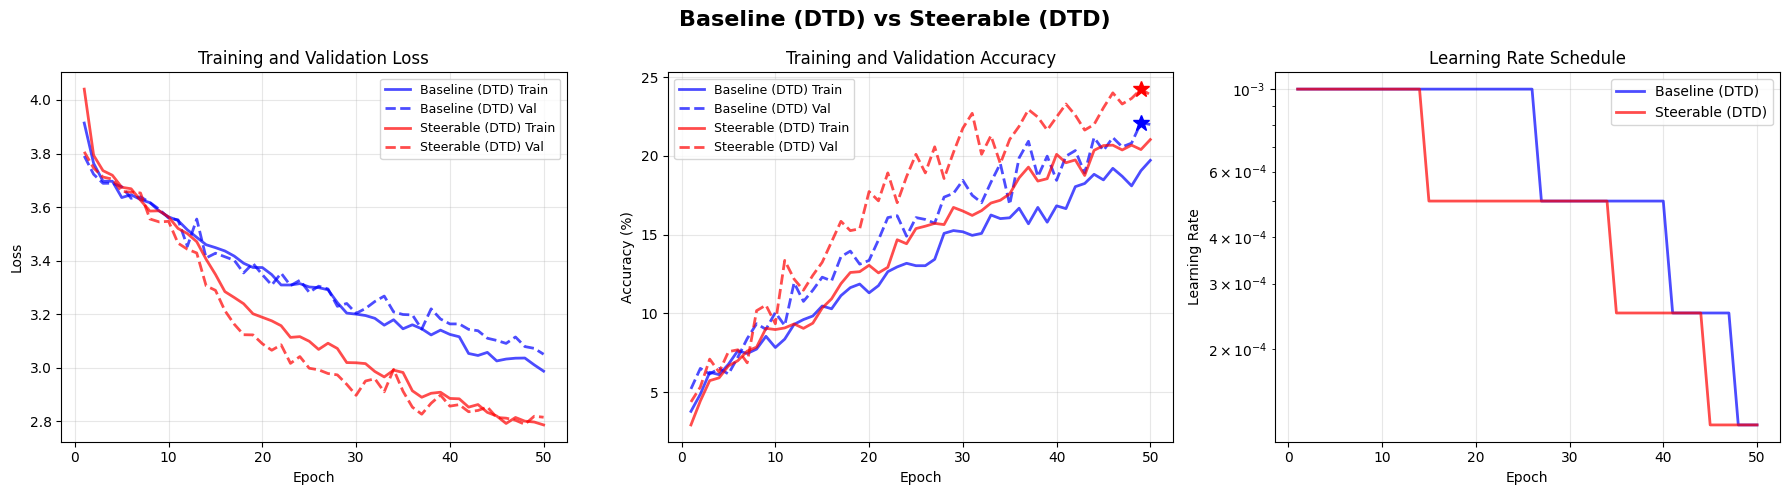

In [8]:
# Evaluate DTD-trained models and visualize

# Load DTD model
# from models.baseline_cnn import SimpleBaselineCNN
# from models.steerable_cnn import SimpleSteerableCNN
# from utils.visualization import compare_two_models

baseline_dtd = SimpleBaselineCNN(num_classes=47).to(Config.device)
checkpoint = torch.load("checkpoints/baseline_dtd.pth", map_location='cpu', weights_only=False)
baseline_dtd.load_state_dict(checkpoint['model_state_dict'])
baseline_dtd_history = checkpoint['history']

steerable_dtd = SimpleSteerableCNN(num_classes=47, N=8).to(Config.device)
checkpoint = torch.load("checkpoints/steerable_dtd.pth", map_location='cpu', weights_only=False)
steerable_dtd.load_state_dict(checkpoint['model_state_dict'])
steerable_dtd_history = checkpoint['history']

print("✅ DTD models loaded")

# Cross-dataset evaluation

print("\n📊 Baseline (trained on DTD)")
baseline_dtd_cross = cross_dataset_evaluation_single_trained(baseline_dtd, 'dtd', Config)

print("\n📊 Steerable (trained on DTD)")
steerable_dtd_cross = cross_dataset_evaluation_single_trained(steerable_dtd, 'dtd', Config)

# Visualize comparison (using DTD test accuracy)
compare_two_models(
    history1=baseline_dtd_history,
    history2=steerable_dtd_history,
    name1='Baseline (DTD)',
    name2='Steerable (DTD)',
    test_acc1=baseline_dtd_cross['dtd']['accuracy'],
    test_acc2=steerable_dtd_cross['dtd']['accuracy'],
    save_name='dtd_baseline_vs_steerable.png'
)

In [9]:
# Train on KTH
kth_train = UnifiedRotatedDataset('kth', 'train', Config.img_size, Config.rotation_range, data_root=Config.data_root)
kth_val = UnifiedRotatedDataset('kth', 'val', Config.img_size, Config.rotation_range, data_root=Config.data_root)
kth_train_loader = DataLoader(kth_train, Config.batch_size, shuffle=True, num_workers=Config.num_workers)
kth_val_loader = DataLoader(kth_val, Config.batch_size, shuffle=False, num_workers=Config.num_workers)
print(f"🏷️ KTH classes: {kth_train.get_num_classes()}")

✅ KTH train finish loading: 567 images
✅ KTH val finish loading: 121 images
🏷️ KTH classes: 10


In [ ]:
# Train Baseline CNN on KTH
# from models.baseline_cnn import SimpleBaselineCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

baseline_kth = SimpleBaselineCNN(num_classes=kth_train.get_num_classes()).to(Config.device)
baseline_kth_trainer = Trainer(baseline_kth, kth_train_loader, kth_val_loader, Config)
baseline_kth_history = baseline_kth_trainer.train()
baseline_kth_trainer.save_checkpoint(f"{Config.checkpoint_dir}/baseline_kth.pth")

✅ SimpleBaselineCNN initialization finished
   Output classes: 10
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 2.7035 | Train Acc: 22.22%
Val Loss:   1.8166 | Val Acc:   35.54%
Learning Rate: 0.001000
✅ Best model: 35.54%

Epoch 2/50
------------------------------------------------------------


Train Loss: 1.8653 | Train Acc: 33.51%
Val Loss:   1.5736 | Val Acc:   36.36%
Learning Rate: 0.001000
✅ Best model: 36.36%

Epoch 3/50
------------------------------------------------------------


Train Loss: 1.6711 | Train Acc: 36.16%
Val Loss:   1.5031 | Val Acc:   40.50%
Learning Rate: 0.001000
✅ Best model: 40.50%

Epoch 4/50
------------------------------------------------------------


Train Loss: 1.5726 | Train Acc: 38.62%
Val Loss:   1.3609 | Val Acc:   47.11%
Learning Rate: 0.001000
✅ Best model: 47.11%

Epoch 5/50
------------------------------------------------------------


Train Loss: 1.5256 | Train Acc: 39.51%
Val Loss:   1.3119 | Val Acc:   43.80%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 1.4818 | Train Acc: 44.09%
Val Loss:   1.5414 | Val Acc:   33.88%
Learning Rate: 0.001000

Epoch 7/50
------------------------------------------------------------


Train Loss: 1.4322 | Train Acc: 42.33%
Val Loss:   1.2487 | Val Acc:   45.45%
Learning Rate: 0.001000

Epoch 8/50
------------------------------------------------------------


Train Loss: 1.3904 | Train Acc: 45.15%
Val Loss:   1.1360 | Val Acc:   54.55%
Learning Rate: 0.001000
✅ Best model: 54.55%

Epoch 9/50
------------------------------------------------------------


Train Loss: 1.3236 | Train Acc: 50.26%
Val Loss:   1.1617 | Val Acc:   47.93%
Learning Rate: 0.001000

Epoch 10/50
------------------------------------------------------------


Train Loss: 1.3633 | Train Acc: 47.09%
Val Loss:   1.1467 | Val Acc:   49.59%
Learning Rate: 0.001000

Epoch 11/50
------------------------------------------------------------


Train Loss: 1.3597 | Train Acc: 46.38%
Val Loss:   1.0699 | Val Acc:   56.20%
Learning Rate: 0.001000
✅ Best model: 56.20%

Epoch 12/50
------------------------------------------------------------


Train Loss: 1.2988 | Train Acc: 49.21%
Val Loss:   1.1486 | Val Acc:   52.07%
Learning Rate: 0.001000

Epoch 13/50
------------------------------------------------------------


Train Loss: 1.2658 | Train Acc: 49.56%
Val Loss:   1.1669 | Val Acc:   56.20%
Learning Rate: 0.001000

Epoch 14/50
------------------------------------------------------------


Train Loss: 1.2490 | Train Acc: 50.09%
Val Loss:   1.0458 | Val Acc:   54.55%
Learning Rate: 0.001000

Epoch 15/50
------------------------------------------------------------


Train Loss: 1.2183 | Train Acc: 51.50%
Val Loss:   0.9556 | Val Acc:   58.68%
Learning Rate: 0.001000
✅ Best model: 58.68%

Epoch 16/50
------------------------------------------------------------


Train Loss: 1.4057 | Train Acc: 45.50%
Val Loss:   1.2474 | Val Acc:   52.07%
Learning Rate: 0.001000

Epoch 17/50
------------------------------------------------------------


Train Loss: 1.2338 | Train Acc: 49.38%
Val Loss:   1.1862 | Val Acc:   51.24%
Learning Rate: 0.001000

Epoch 18/50
------------------------------------------------------------


Train Loss: 1.2393 | Train Acc: 53.44%
Val Loss:   0.9761 | Val Acc:   62.81%
Learning Rate: 0.001000
✅ Best model: 62.81%

Epoch 19/50
------------------------------------------------------------


Train Loss: 1.1972 | Train Acc: 52.56%
Val Loss:   0.9553 | Val Acc:   63.64%
Learning Rate: 0.001000
✅ Best model: 63.64%

Epoch 20/50
------------------------------------------------------------


Train Loss: 1.1529 | Train Acc: 53.26%
Val Loss:   0.9934 | Val Acc:   63.64%
Learning Rate: 0.001000

Epoch 21/50
------------------------------------------------------------


Train Loss: 1.0694 | Train Acc: 57.50%
Val Loss:   0.9303 | Val Acc:   66.12%
Learning Rate: 0.001000
✅ Best model: 66.12%

Epoch 22/50
------------------------------------------------------------


Train Loss: 1.1518 | Train Acc: 52.03%
Val Loss:   0.8337 | Val Acc:   65.29%
Learning Rate: 0.001000

Epoch 23/50
------------------------------------------------------------


Train Loss: 1.1384 | Train Acc: 55.38%
Val Loss:   0.9242 | Val Acc:   66.12%
Learning Rate: 0.001000

Epoch 24/50
------------------------------------------------------------


Train Loss: 1.0726 | Train Acc: 57.67%
Val Loss:   0.9136 | Val Acc:   65.29%
Learning Rate: 0.001000

Epoch 25/50
------------------------------------------------------------


Train Loss: 1.0142 | Train Acc: 60.49%
Val Loss:   0.7320 | Val Acc:   77.69%
Learning Rate: 0.001000
✅ Best model: 77.69%

Epoch 26/50
------------------------------------------------------------


Train Loss: 1.0657 | Train Acc: 57.67%
Val Loss:   0.9196 | Val Acc:   66.94%
Learning Rate: 0.001000

Epoch 27/50
------------------------------------------------------------


Train Loss: 1.1901 | Train Acc: 56.26%
Val Loss:   1.1104 | Val Acc:   56.20%
Learning Rate: 0.001000

Epoch 28/50
------------------------------------------------------------


Train Loss: 1.1471 | Train Acc: 55.91%
Val Loss:   1.1360 | Val Acc:   50.41%
Learning Rate: 0.001000

Epoch 29/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 1.1489 | Train Acc: 59.26%
Val Loss:   0.8688 | Val Acc:   66.94%
Learning Rate: 0.000500

Epoch 30/50
------------------------------------------------------------


Train Loss: 0.9868 | Train Acc: 61.90%
Val Loss:   0.7032 | Val Acc:   72.73%
Learning Rate: 0.000500

Epoch 31/50
------------------------------------------------------------


Train Loss: 0.9440 | Train Acc: 64.90%
Val Loss:   0.7019 | Val Acc:   76.86%
Learning Rate: 0.000500

Epoch 32/50
------------------------------------------------------------


Train Loss: 0.9586 | Train Acc: 62.79%
Val Loss:   0.7196 | Val Acc:   70.25%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


Train Loss: 0.8576 | Train Acc: 66.49%
Val Loss:   0.6207 | Val Acc:   80.17%
Learning Rate: 0.000500
✅ Best model: 80.17%

Epoch 34/50
------------------------------------------------------------


Train Loss: 0.8226 | Train Acc: 67.90%
Val Loss:   0.5718 | Val Acc:   80.99%
Learning Rate: 0.000500
✅ Best model: 80.99%

Epoch 35/50
------------------------------------------------------------


Train Loss: 0.7927 | Train Acc: 70.19%
Val Loss:   0.6703 | Val Acc:   73.55%
Learning Rate: 0.000500

Epoch 36/50
------------------------------------------------------------


Train Loss: 0.8235 | Train Acc: 69.14%
Val Loss:   0.5831 | Val Acc:   80.17%
Learning Rate: 0.000500

Epoch 37/50
------------------------------------------------------------


Train Loss: 0.8169 | Train Acc: 67.90%
Val Loss:   0.5846 | Val Acc:   81.82%
Learning Rate: 0.000500
✅ Best model: 81.82%

Epoch 38/50
------------------------------------------------------------


Train Loss: 0.7706 | Train Acc: 70.19%
Val Loss:   0.6027 | Val Acc:   78.51%
Learning Rate: 0.000500

Epoch 39/50
------------------------------------------------------------


Train Loss: 0.7582 | Train Acc: 71.60%
Val Loss:   0.5267 | Val Acc:   81.82%
Learning Rate: 0.000500

Epoch 40/50
------------------------------------------------------------


Train Loss: 0.8272 | Train Acc: 68.61%
Val Loss:   0.5543 | Val Acc:   81.82%
Learning Rate: 0.000500

Epoch 41/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 0.7880 | Train Acc: 70.55%
Val Loss:   0.5355 | Val Acc:   78.51%
Learning Rate: 0.000250

Epoch 42/50
------------------------------------------------------------


Train Loss: 0.7013 | Train Acc: 73.54%
Val Loss:   0.5799 | Val Acc:   80.99%
Learning Rate: 0.000250

Epoch 43/50
------------------------------------------------------------


Train Loss: 0.7232 | Train Acc: 74.60%
Val Loss:   0.4666 | Val Acc:   81.82%
Learning Rate: 0.000250

Epoch 44/50
------------------------------------------------------------


Train Loss: 0.6147 | Train Acc: 77.78%
Val Loss:   0.4500 | Val Acc:   88.43%
Learning Rate: 0.000250
✅ Best model: 88.43%

Epoch 45/50
------------------------------------------------------------


Train Loss: 0.5787 | Train Acc: 78.84%
Val Loss:   0.4349 | Val Acc:   82.64%
Learning Rate: 0.000250

Epoch 46/50
------------------------------------------------------------


Train Loss: 0.6300 | Train Acc: 76.72%
Val Loss:   0.4896 | Val Acc:   85.12%
Learning Rate: 0.000250

Epoch 47/50
------------------------------------------------------------


Train Loss: 0.6370 | Train Acc: 77.07%
Val Loss:   0.4563 | Val Acc:   83.47%
Learning Rate: 0.000250

Epoch 48/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 0.6048 | Train Acc: 77.78%
Val Loss:   0.4438 | Val Acc:   85.12%
Learning Rate: 0.000125

Epoch 49/50
------------------------------------------------------------


Train Loss: 0.6319 | Train Acc: 75.13%
Val Loss:   0.5067 | Val Acc:   85.12%
Learning Rate: 0.000125

Epoch 50/50
------------------------------------------------------------


Train Loss: 0.6059 | Train Acc: 77.43%
Val Loss:   0.4345 | Val Acc:   84.30%
Learning Rate: 0.000125

✅ Training finished！
⏱️  Total time: 1.4 minutes
🏆 Best validation accuracy: 88.43%
💾 Model saved at: ./checkpoints/baseline_kth.pth


In [ ]:
# Train Steerable CNN on KTH
# from models.steerable_cnn import SimpleSteerableCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)


steerable_kth = SimpleSteerableCNN(num_classes=kth_train.get_num_classes(), N=8).to(Config.device)
steerable_kth_trainer = Trainer(steerable_kth, kth_train_loader, kth_val_loader, Config)
steerable_kth_history = steerable_kth_trainer.train()
steerable_kth_trainer.save_checkpoint(f"{Config.checkpoint_dir}/steerable_kth.pth")

✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 10
   Eqivariance: SO(2) continuous rotation
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 4.6784 | Train Acc: 18.69%
Val Loss:   1.7594 | Val Acc:   29.75%
Learning Rate: 0.001000
✅ Best model: 29.75%

Epoch 2/50
------------------------------------------------------------


Train Loss: 1.9831 | Train Acc: 29.45%
Val Loss:   1.5371 | Val Acc:   40.50%
Learning Rate: 0.001000
✅ Best model: 40.50%

Epoch 3/50
------------------------------------------------------------


Train Loss: 1.7074 | Train Acc: 34.04%
Val Loss:   1.4796 | Val Acc:   47.11%
Learning Rate: 0.001000
✅ Best model: 47.11%

Epoch 4/50
------------------------------------------------------------


Train Loss: 1.6285 | Train Acc: 40.74%
Val Loss:   1.3236 | Val Acc:   50.41%
Learning Rate: 0.001000
✅ Best model: 50.41%

Epoch 5/50
------------------------------------------------------------


Train Loss: 1.5004 | Train Acc: 43.21%
Val Loss:   1.2201 | Val Acc:   48.76%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 1.4329 | Train Acc: 45.33%
Val Loss:   1.1782 | Val Acc:   56.20%
Learning Rate: 0.001000
✅ Best model: 56.20%

Epoch 7/50
------------------------------------------------------------


Train Loss: 1.3265 | Train Acc: 46.03%
Val Loss:   0.9772 | Val Acc:   65.29%
Learning Rate: 0.001000
✅ Best model: 65.29%

Epoch 8/50
------------------------------------------------------------


Train Loss: 1.2324 | Train Acc: 53.44%
Val Loss:   0.9465 | Val Acc:   57.85%
Learning Rate: 0.001000

Epoch 9/50
------------------------------------------------------------


Train Loss: 1.1550 | Train Acc: 55.73%
Val Loss:   0.8122 | Val Acc:   70.25%
Learning Rate: 0.001000
✅ Best model: 70.25%

Epoch 10/50
------------------------------------------------------------


Train Loss: 1.0315 | Train Acc: 60.85%
Val Loss:   0.6772 | Val Acc:   71.90%
Learning Rate: 0.001000
✅ Best model: 71.90%

Epoch 11/50
------------------------------------------------------------


Train Loss: 0.9837 | Train Acc: 62.79%
Val Loss:   0.7892 | Val Acc:   69.42%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


Train Loss: 0.9694 | Train Acc: 61.90%
Val Loss:   0.7455 | Val Acc:   69.42%
Learning Rate: 0.001000

Epoch 13/50
------------------------------------------------------------


Train Loss: 0.8851 | Train Acc: 63.84%
Val Loss:   0.5868 | Val Acc:   76.03%
Learning Rate: 0.001000
✅ Best model: 76.03%

Epoch 14/50
------------------------------------------------------------


Train Loss: 0.8007 | Train Acc: 70.37%
Val Loss:   0.5632 | Val Acc:   78.51%
Learning Rate: 0.001000
✅ Best model: 78.51%

Epoch 15/50
------------------------------------------------------------


Train Loss: 0.7392 | Train Acc: 73.90%
Val Loss:   0.4833 | Val Acc:   79.34%
Learning Rate: 0.001000
✅ Best model: 79.34%

Epoch 16/50
------------------------------------------------------------


Train Loss: 0.7389 | Train Acc: 70.55%
Val Loss:   0.5672 | Val Acc:   76.86%
Learning Rate: 0.001000

Epoch 17/50
------------------------------------------------------------


Train Loss: 0.7113 | Train Acc: 72.31%
Val Loss:   0.4756 | Val Acc:   80.99%
Learning Rate: 0.001000
✅ Best model: 80.99%

Epoch 18/50
------------------------------------------------------------


Train Loss: 0.7318 | Train Acc: 71.60%
Val Loss:   0.4119 | Val Acc:   86.78%
Learning Rate: 0.001000
✅ Best model: 86.78%

Epoch 19/50
------------------------------------------------------------


Train Loss: 0.6293 | Train Acc: 75.66%
Val Loss:   0.3447 | Val Acc:   90.08%
Learning Rate: 0.001000
✅ Best model: 90.08%

Epoch 20/50
------------------------------------------------------------


Train Loss: 0.5804 | Train Acc: 78.13%
Val Loss:   0.3678 | Val Acc:   84.30%
Learning Rate: 0.001000

Epoch 21/50
------------------------------------------------------------


Train Loss: 0.6273 | Train Acc: 73.72%
Val Loss:   0.3426 | Val Acc:   88.43%
Learning Rate: 0.001000

Epoch 22/50
------------------------------------------------------------


Train Loss: 0.5242 | Train Acc: 80.42%
Val Loss:   0.4456 | Val Acc:   83.47%
Learning Rate: 0.001000

Epoch 23/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 0.5765 | Train Acc: 78.66%
Val Loss:   0.4197 | Val Acc:   82.64%
Learning Rate: 0.000500

Epoch 24/50
------------------------------------------------------------


Train Loss: 0.4356 | Train Acc: 82.54%
Val Loss:   0.2639 | Val Acc:   90.08%
Learning Rate: 0.000500

Epoch 25/50
------------------------------------------------------------


Train Loss: 0.4487 | Train Acc: 81.48%
Val Loss:   0.2758 | Val Acc:   91.74%
Learning Rate: 0.000500
✅ Best model: 91.74%

Epoch 26/50
------------------------------------------------------------


Train Loss: 0.4477 | Train Acc: 82.89%
Val Loss:   0.2946 | Val Acc:   88.43%
Learning Rate: 0.000500

Epoch 27/50
------------------------------------------------------------


Train Loss: 0.3577 | Train Acc: 86.42%
Val Loss:   0.2545 | Val Acc:   92.56%
Learning Rate: 0.000500
✅ Best model: 92.56%

Epoch 28/50
------------------------------------------------------------


Train Loss: 0.3392 | Train Acc: 86.77%
Val Loss:   0.2220 | Val Acc:   90.08%
Learning Rate: 0.000500

Epoch 29/50
------------------------------------------------------------


Train Loss: 0.3498 | Train Acc: 86.60%
Val Loss:   0.2834 | Val Acc:   84.30%
Learning Rate: 0.000500

Epoch 30/50
------------------------------------------------------------


Train Loss: 0.3413 | Train Acc: 85.89%
Val Loss:   0.2102 | Val Acc:   93.39%
Learning Rate: 0.000500
✅ Best model: 93.39%

Epoch 31/50
------------------------------------------------------------


Train Loss: 0.3990 | Train Acc: 85.36%
Val Loss:   0.2342 | Val Acc:   93.39%
Learning Rate: 0.000500

Epoch 32/50
------------------------------------------------------------


Train Loss: 0.3675 | Train Acc: 84.13%
Val Loss:   0.2161 | Val Acc:   92.56%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


Train Loss: 0.3091 | Train Acc: 86.95%
Val Loss:   0.1818 | Val Acc:   95.87%
Learning Rate: 0.000500
✅ Best model: 95.87%

Epoch 34/50
------------------------------------------------------------


Train Loss: 0.3251 | Train Acc: 88.01%
Val Loss:   0.1863 | Val Acc:   92.56%
Learning Rate: 0.000500

Epoch 35/50
------------------------------------------------------------


Train Loss: 0.3254 | Train Acc: 88.36%
Val Loss:   0.2159 | Val Acc:   90.91%
Learning Rate: 0.000500

Epoch 36/50
------------------------------------------------------------


Train Loss: 0.3394 | Train Acc: 85.89%
Val Loss:   0.1837 | Val Acc:   90.91%
Learning Rate: 0.000500

Epoch 37/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 0.3336 | Train Acc: 86.95%
Val Loss:   0.1797 | Val Acc:   93.39%
Learning Rate: 0.000250

Epoch 38/50
------------------------------------------------------------


Train Loss: 0.3060 | Train Acc: 87.30%
Val Loss:   0.1851 | Val Acc:   92.56%
Learning Rate: 0.000250

Epoch 39/50
------------------------------------------------------------


Train Loss: 0.2574 | Train Acc: 92.06%
Val Loss:   0.1997 | Val Acc:   91.74%
Learning Rate: 0.000250

Epoch 40/50
------------------------------------------------------------


Train Loss: 0.2533 | Train Acc: 89.42%
Val Loss:   0.1739 | Val Acc:   92.56%
Learning Rate: 0.000250

Epoch 41/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 0.2477 | Train Acc: 90.12%
Val Loss:   0.1735 | Val Acc:   91.74%
Learning Rate: 0.000125

Epoch 42/50
------------------------------------------------------------


Train Loss: 0.2073 | Train Acc: 91.71%
Val Loss:   0.1384 | Val Acc:   95.04%
Learning Rate: 0.000125

Epoch 43/50
------------------------------------------------------------


Train Loss: 0.2273 | Train Acc: 91.53%
Val Loss:   0.1429 | Val Acc:   95.04%
Learning Rate: 0.000125

Epoch 44/50
------------------------------------------------------------


Train Loss: 0.1906 | Train Acc: 93.30%
Val Loss:   0.1412 | Val Acc:   95.04%
Learning Rate: 0.000125

Epoch 45/50
------------------------------------------------------------


Train Loss: 0.2117 | Train Acc: 91.89%
Val Loss:   0.1231 | Val Acc:   97.52%
Learning Rate: 0.000125
✅ Best model: 97.52%

Epoch 46/50
------------------------------------------------------------


Train Loss: 0.2003 | Train Acc: 93.30%
Val Loss:   0.1401 | Val Acc:   92.56%
Learning Rate: 0.000125

Epoch 47/50
------------------------------------------------------------


Train Loss: 0.1792 | Train Acc: 93.65%
Val Loss:   0.1243 | Val Acc:   96.69%
Learning Rate: 0.000125

Epoch 48/50
------------------------------------------------------------


Train Loss: 0.1891 | Train Acc: 92.95%
Val Loss:   0.1217 | Val Acc:   95.87%
Learning Rate: 0.000125

Epoch 49/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000125 → 0.000063
Train Loss: 0.1815 | Train Acc: 93.65%
Val Loss:   0.1544 | Val Acc:   91.74%
Learning Rate: 0.000063

Epoch 50/50
------------------------------------------------------------


Train Loss: 0.1944 | Train Acc: 92.06%
Val Loss:   0.1479 | Val Acc:   95.04%
Learning Rate: 0.000063

✅ Training finished！
⏱️  Total time: 2.1 minutes
🏆 Best validation accuracy: 97.52%
💾 Model saved at: ./checkpoints/steerable_kth.pth


✅ SimpleBaselineCNN initialization finished
   Output classes: 10
✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 10
   Eqivariance: SO(2) continuous rotation
✅ KTH models loaded

📊 Baseline (trained on KTH)
🔬 Cross-dataset evaluation (Trained on KTH)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 2.24%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 79.51%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 7.40%

📊 Steerable (trained on KTH)
🔬 Cross-dataset evaluation (Trained on KTH)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 2.36%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 96.72%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 9.60%
📊 Saved: results/dtd_baseline_vs_steerable.png

📊 Baseline (KTH) vs Steerable (KTH)
Metric                         Baseline (KTH)       Steerable (KTH)      Diff           
--------------------------------------------------------------------------------
Final Train Accuracy           77.43               % 92.06               % +14.64%
Final Val Accuracy             84.30               % 95.04               % +10.74%
Best Val Accuracy              88.43               % 97.52               % +9.09%
Test Accuracy                  79.51               % 96.72               % +17.21%


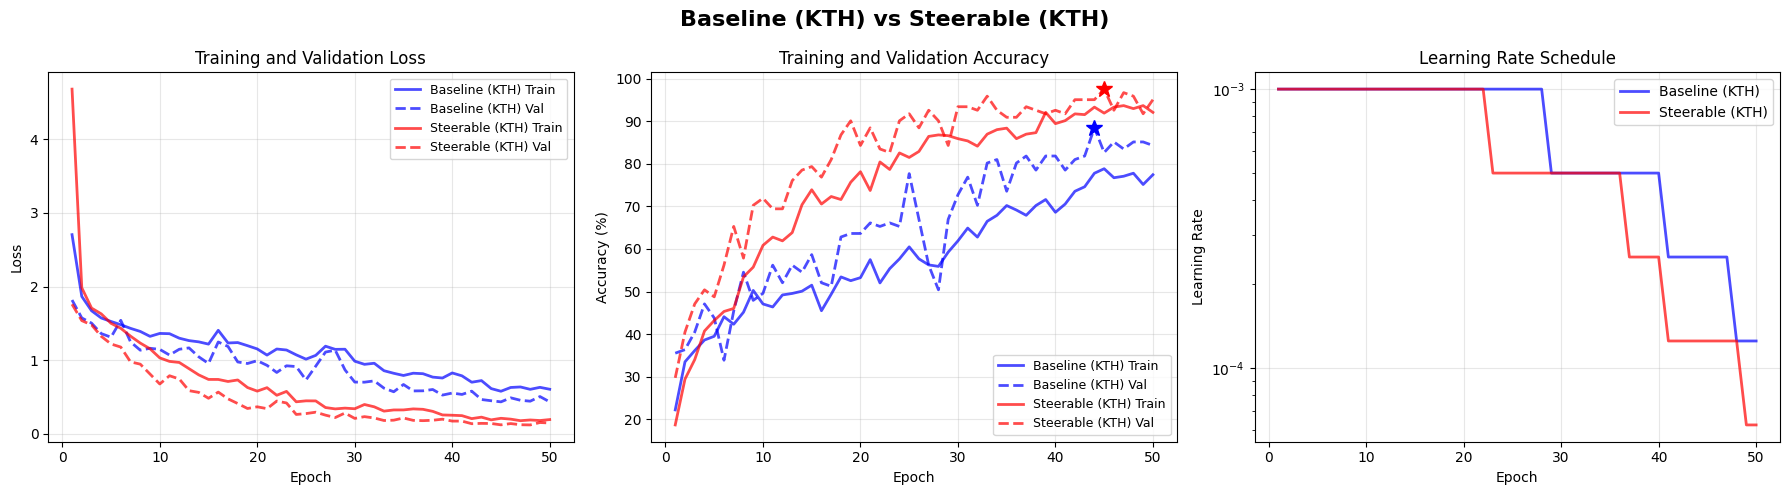

In [12]:
# Evaluate the model and visulize the result for KTH

baseline_kth = SimpleBaselineCNN(num_classes=10).to(Config.device)
checkpoint = torch.load("checkpoints/baseline_kth.pth", map_location='cpu', weights_only=False)
baseline_kth.load_state_dict(checkpoint['model_state_dict'])
baseline_kth_history = checkpoint['history']

steerable_kth = SimpleSteerableCNN(num_classes=10, N=8).to(Config.device)
checkpoint = torch.load("checkpoints/steerable_kth.pth", map_location='cpu', weights_only=False)
steerable_kth.load_state_dict(checkpoint['model_state_dict'])
steerable_kth_history = checkpoint['history']

print("✅ KTH models loaded")

# Cross-dataset evaluation

print("\n📊 Baseline (trained on KTH)")
baseline_kth_cross = cross_dataset_evaluation_single_trained(baseline_kth, 'kth', Config)

print("\n📊 Steerable (trained on KTH)")
steerable_kth_cross = cross_dataset_evaluation_single_trained(steerable_kth, 'kth', Config)

# Visualize comparison (using DTD test accuracy)
compare_two_models(
    history1=baseline_kth_history,
    history2=steerable_kth_history,
    name1='Baseline (KTH)',
    name2='Steerable (KTH)',
    test_acc1=baseline_kth_cross['kth']['accuracy'],
    test_acc2=steerable_kth_cross['kth']['accuracy'],
    save_name='dtd_baseline_vs_steerable.png'
)

In [13]:
# Train on CIFAR-10
cifar_train = UnifiedRotatedDataset('cifar10', 'train', Config.img_size, Config.rotation_range, data_root=Config.data_root)
cifar_val = UnifiedRotatedDataset('cifar10', 'val', Config.img_size, Config.rotation_range, data_root=Config.data_root)
cifar_train_loader = DataLoader(cifar_train, Config.batch_size, shuffle=True, num_workers=Config.num_workers)
cifar_val_loader = DataLoader(cifar_val, Config.batch_size, shuffle=False, num_workers=Config.num_workers)
print(f"🏷️ CIFAR-10 classes: {cifar_train.get_num_classes()}")

✅ CIFAR10 train finish loading: 4250 images
✅ CIFAR10 val finish loading: 1000 images
🏷️ CIFAR-10 classes: 10


In [ ]:
# Train Baseline CNN on Cifar10 (subsampled)
# from models.baseline_cnn import SimpleBaselineCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

baseline_cifar = SimpleBaselineCNN(num_classes=cifar_train.get_num_classes()).to(Config.device)
baseline_cifar_trainer = Trainer(baseline_cifar, cifar_train_loader, cifar_val_loader, Config)
baseline_cifar_history = baseline_cifar_trainer.train()
baseline_cifar_trainer.save_checkpoint(f"{Config.checkpoint_dir}/baseline_cifar.pth")

✅ SimpleBaselineCNN initialization finished
   Output classes: 10
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 2.1904 | Train Acc: 22.45%
Val Loss:   2.5822 | Val Acc:   25.50%
Learning Rate: 0.001000
✅ Best model: 25.50%

Epoch 2/50
------------------------------------------------------------


Train Loss: 1.9109 | Train Acc: 28.54%
Val Loss:   2.8477 | Val Acc:   28.50%
Learning Rate: 0.001000
✅ Best model: 28.50%

Epoch 3/50
------------------------------------------------------------


Train Loss: 1.8759 | Train Acc: 30.40%
Val Loss:   2.9483 | Val Acc:   28.20%
Learning Rate: 0.001000

Epoch 4/50
------------------------------------------------------------


Train Loss: 1.8176 | Train Acc: 32.33%
Val Loss:   2.9458 | Val Acc:   32.40%
Learning Rate: 0.001000
✅ Best model: 32.40%

Epoch 5/50
------------------------------------------------------------


Train Loss: 1.8141 | Train Acc: 32.19%
Val Loss:   3.0977 | Val Acc:   32.30%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 1.7746 | Train Acc: 34.75%
Val Loss:   3.2286 | Val Acc:   31.30%
Learning Rate: 0.001000

Epoch 7/50
------------------------------------------------------------


Train Loss: 1.7609 | Train Acc: 34.61%
Val Loss:   3.1169 | Val Acc:   34.20%
Learning Rate: 0.001000
✅ Best model: 34.20%

Epoch 8/50
------------------------------------------------------------


Train Loss: 1.7415 | Train Acc: 35.04%
Val Loss:   3.6033 | Val Acc:   35.50%
Learning Rate: 0.001000
✅ Best model: 35.50%

Epoch 9/50
------------------------------------------------------------


Train Loss: 1.7131 | Train Acc: 37.11%
Val Loss:   3.4833 | Val Acc:   34.50%
Learning Rate: 0.001000

Epoch 10/50
------------------------------------------------------------


Train Loss: 1.7194 | Train Acc: 36.02%
Val Loss:   3.4523 | Val Acc:   33.50%
Learning Rate: 0.001000

Epoch 11/50
------------------------------------------------------------


Train Loss: 1.7206 | Train Acc: 36.89%
Val Loss:   3.6683 | Val Acc:   35.20%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 1.7010 | Train Acc: 37.98%
Val Loss:   3.3226 | Val Acc:   35.20%
Learning Rate: 0.000500

Epoch 13/50
------------------------------------------------------------


Train Loss: 1.6393 | Train Acc: 39.62%
Val Loss:   3.9024 | Val Acc:   36.00%
Learning Rate: 0.000500
✅ Best model: 36.00%

Epoch 14/50
------------------------------------------------------------


Train Loss: 1.6441 | Train Acc: 39.79%
Val Loss:   3.5897 | Val Acc:   39.00%
Learning Rate: 0.000500
✅ Best model: 39.00%

Epoch 15/50
------------------------------------------------------------


Train Loss: 1.6247 | Train Acc: 41.11%
Val Loss:   3.6965 | Val Acc:   36.20%
Learning Rate: 0.000500

Epoch 16/50
------------------------------------------------------------


Train Loss: 1.6143 | Train Acc: 40.92%
Val Loss:   3.5548 | Val Acc:   37.40%
Learning Rate: 0.000500

Epoch 17/50
------------------------------------------------------------


Train Loss: 1.6130 | Train Acc: 40.24%
Val Loss:   3.6759 | Val Acc:   37.40%
Learning Rate: 0.000500

Epoch 18/50
------------------------------------------------------------


Train Loss: 1.6097 | Train Acc: 40.92%
Val Loss:   3.7651 | Val Acc:   41.10%
Learning Rate: 0.000500
✅ Best model: 41.10%

Epoch 19/50
------------------------------------------------------------


Train Loss: 1.5924 | Train Acc: 41.41%
Val Loss:   3.6350 | Val Acc:   38.90%
Learning Rate: 0.000500

Epoch 20/50
------------------------------------------------------------


Train Loss: 1.5862 | Train Acc: 42.35%
Val Loss:   3.8990 | Val Acc:   39.20%
Learning Rate: 0.000500

Epoch 21/50
------------------------------------------------------------


Train Loss: 1.5774 | Train Acc: 42.09%
Val Loss:   3.7061 | Val Acc:   37.00%
Learning Rate: 0.000500

Epoch 22/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 1.5803 | Train Acc: 41.69%
Val Loss:   3.7411 | Val Acc:   38.50%
Learning Rate: 0.000250

Epoch 23/50
------------------------------------------------------------


Train Loss: 1.5498 | Train Acc: 43.53%
Val Loss:   3.8889 | Val Acc:   39.60%
Learning Rate: 0.000250

Epoch 24/50
------------------------------------------------------------


Train Loss: 1.5173 | Train Acc: 44.68%
Val Loss:   3.9152 | Val Acc:   41.00%
Learning Rate: 0.000250

Epoch 25/50
------------------------------------------------------------


Train Loss: 1.5220 | Train Acc: 44.59%
Val Loss:   3.7863 | Val Acc:   41.00%
Learning Rate: 0.000250

Epoch 26/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 1.5028 | Train Acc: 44.26%
Val Loss:   3.8400 | Val Acc:   40.30%
Learning Rate: 0.000125

Epoch 27/50
------------------------------------------------------------


Train Loss: 1.4702 | Train Acc: 46.94%
Val Loss:   3.8207 | Val Acc:   40.50%
Learning Rate: 0.000125

Epoch 28/50
------------------------------------------------------------


Train Loss: 1.4789 | Train Acc: 45.48%
Val Loss:   3.9222 | Val Acc:   41.70%
Learning Rate: 0.000125
✅ Best model: 41.70%

Epoch 29/50
------------------------------------------------------------


Train Loss: 1.4696 | Train Acc: 45.98%
Val Loss:   4.0345 | Val Acc:   41.30%
Learning Rate: 0.000125

Epoch 30/50
------------------------------------------------------------


Train Loss: 1.4714 | Train Acc: 45.55%
Val Loss:   4.0460 | Val Acc:   39.80%
Learning Rate: 0.000125

Epoch 31/50
------------------------------------------------------------


Train Loss: 1.4508 | Train Acc: 47.72%
Val Loss:   4.0056 | Val Acc:   40.60%
Learning Rate: 0.000125

Epoch 32/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000125 → 0.000063
Train Loss: 1.4671 | Train Acc: 46.52%
Val Loss:   3.9663 | Val Acc:   40.60%
Learning Rate: 0.000063

Epoch 33/50
------------------------------------------------------------


Train Loss: 1.4651 | Train Acc: 45.86%
Val Loss:   3.8370 | Val Acc:   41.40%
Learning Rate: 0.000063

Epoch 34/50
------------------------------------------------------------


Train Loss: 1.4464 | Train Acc: 46.89%
Val Loss:   4.0464 | Val Acc:   41.90%
Learning Rate: 0.000063
✅ Best model: 41.90%

Epoch 35/50
------------------------------------------------------------


Train Loss: 1.4467 | Train Acc: 47.53%
Val Loss:   3.9739 | Val Acc:   42.40%
Learning Rate: 0.000063
✅ Best model: 42.40%

Epoch 36/50
------------------------------------------------------------


Train Loss: 1.4482 | Train Acc: 46.40%
Val Loss:   3.9483 | Val Acc:   41.60%
Learning Rate: 0.000063

Epoch 37/50
------------------------------------------------------------


Train Loss: 1.4273 | Train Acc: 48.35%
Val Loss:   4.0274 | Val Acc:   41.90%
Learning Rate: 0.000063

Epoch 38/50
------------------------------------------------------------


Train Loss: 1.4432 | Train Acc: 47.20%
Val Loss:   3.9715 | Val Acc:   42.00%
Learning Rate: 0.000063

Epoch 39/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000063 → 0.000031
Train Loss: 1.4470 | Train Acc: 47.34%
Val Loss:   3.9220 | Val Acc:   42.30%
Learning Rate: 0.000031

Epoch 40/50
------------------------------------------------------------


Train Loss: 1.4280 | Train Acc: 47.55%
Val Loss:   3.9797 | Val Acc:   44.30%
Learning Rate: 0.000031
✅ Best model: 44.30%

Epoch 41/50
------------------------------------------------------------


Train Loss: 1.4375 | Train Acc: 47.58%
Val Loss:   3.9457 | Val Acc:   42.60%
Learning Rate: 0.000031

Epoch 42/50
------------------------------------------------------------


Train Loss: 1.4210 | Train Acc: 48.19%
Val Loss:   4.0131 | Val Acc:   42.40%
Learning Rate: 0.000031

Epoch 43/50
------------------------------------------------------------


Train Loss: 1.4375 | Train Acc: 46.66%
Val Loss:   3.8746 | Val Acc:   41.60%
Learning Rate: 0.000031

Epoch 44/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000031 → 0.000016
Train Loss: 1.4213 | Train Acc: 48.09%
Val Loss:   3.8871 | Val Acc:   44.00%
Learning Rate: 0.000016

Epoch 45/50
------------------------------------------------------------


Train Loss: 1.4316 | Train Acc: 47.39%
Val Loss:   3.9369 | Val Acc:   42.50%
Learning Rate: 0.000016

Epoch 46/50
------------------------------------------------------------


Train Loss: 1.4148 | Train Acc: 47.55%
Val Loss:   3.8789 | Val Acc:   42.40%
Learning Rate: 0.000016

Epoch 47/50
------------------------------------------------------------


Train Loss: 1.4166 | Train Acc: 48.12%
Val Loss:   3.9975 | Val Acc:   41.70%
Learning Rate: 0.000016

Epoch 48/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000016 → 0.000008
Train Loss: 1.4169 | Train Acc: 48.26%
Val Loss:   3.9131 | Val Acc:   43.10%
Learning Rate: 0.000008

Epoch 49/50
------------------------------------------------------------


Train Loss: 1.4180 | Train Acc: 47.58%
Val Loss:   3.9214 | Val Acc:   42.80%
Learning Rate: 0.000008

Epoch 50/50
------------------------------------------------------------


Train Loss: 1.3964 | Train Acc: 49.15%
Val Loss:   3.9844 | Val Acc:   43.40%
Learning Rate: 0.000008

✅ Training finished！
⏱️  Total time: 6.0 minutes
🏆 Best validation accuracy: 44.30%
💾 Model saved at: ./checkpoints/baseline_cifar.pth


In [ ]:
# Train Steerable CNN on Cifar10(subsampled)
# from models.steerable_cnn import SimpleSteerableCNN

# Set seed
torch.manual_seed(Config.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(Config.seed)

steerable_cifar = SimpleSteerableCNN(num_classes=cifar_train.get_num_classes(), N=8).to(Config.device)
steerable_cifar_trainer = Trainer(steerable_cifar, cifar_train_loader, cifar_val_loader, Config)
steerable_cifar_history = steerable_cifar_trainer.train()
steerable_cifar_trainer.save_checkpoint(f"{Config.checkpoint_dir}/steerable_cifar.pth")

✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 10
   Eqivariance: SO(2) continuous rotation
✅ Trainer initialized finished
   Optimizer: Adam (lr=0.001)
   Lose function: CrossEntropyLoss

🚀 Begin training - 50 epochs

Epoch 1/50
------------------------------------------------------------


Train Loss: 2.3556 | Train Acc: 23.39%
Val Loss:   2.8962 | Val Acc:   28.30%
Learning Rate: 0.001000
✅ Best model: 28.30%

Epoch 2/50
------------------------------------------------------------


Train Loss: 1.8667 | Train Acc: 30.19%
Val Loss:   2.5212 | Val Acc:   29.40%
Learning Rate: 0.001000
✅ Best model: 29.40%

Epoch 3/50
------------------------------------------------------------


Train Loss: 1.8004 | Train Acc: 33.93%
Val Loss:   2.7696 | Val Acc:   33.30%
Learning Rate: 0.001000
✅ Best model: 33.30%

Epoch 4/50
------------------------------------------------------------


Train Loss: 1.7712 | Train Acc: 35.44%
Val Loss:   3.0899 | Val Acc:   35.80%
Learning Rate: 0.001000
✅ Best model: 35.80%

Epoch 5/50
------------------------------------------------------------


Train Loss: 1.7267 | Train Acc: 36.66%
Val Loss:   3.6994 | Val Acc:   34.00%
Learning Rate: 0.001000

Epoch 6/50
------------------------------------------------------------


Train Loss: 1.6851 | Train Acc: 38.00%
Val Loss:   2.8240 | Val Acc:   38.90%
Learning Rate: 0.001000
✅ Best model: 38.90%

Epoch 7/50
------------------------------------------------------------


Train Loss: 1.6378 | Train Acc: 39.69%
Val Loss:   4.0394 | Val Acc:   37.90%
Learning Rate: 0.001000

Epoch 8/50
------------------------------------------------------------


Train Loss: 1.6192 | Train Acc: 40.94%
Val Loss:   3.1693 | Val Acc:   36.20%
Learning Rate: 0.001000

Epoch 9/50
------------------------------------------------------------


Train Loss: 1.5885 | Train Acc: 41.62%
Val Loss:   3.0585 | Val Acc:   38.50%
Learning Rate: 0.001000

Epoch 10/50
------------------------------------------------------------


Train Loss: 1.5442 | Train Acc: 43.15%
Val Loss:   4.0440 | Val Acc:   41.50%
Learning Rate: 0.001000
✅ Best model: 41.50%

Epoch 11/50
------------------------------------------------------------


Train Loss: 1.5271 | Train Acc: 43.95%
Val Loss:   4.0945 | Val Acc:   39.60%
Learning Rate: 0.001000

Epoch 12/50
------------------------------------------------------------


Train Loss: 1.5086 | Train Acc: 44.24%
Val Loss:   3.2518 | Val Acc:   42.50%
Learning Rate: 0.001000
✅ Best model: 42.50%

Epoch 13/50
------------------------------------------------------------


Train Loss: 1.4644 | Train Acc: 46.56%
Val Loss:   3.5583 | Val Acc:   40.60%
Learning Rate: 0.001000

Epoch 14/50
------------------------------------------------------------


Train Loss: 1.4497 | Train Acc: 47.36%
Val Loss:   3.8385 | Val Acc:   44.80%
Learning Rate: 0.001000
✅ Best model: 44.80%

Epoch 15/50
------------------------------------------------------------


Train Loss: 1.4339 | Train Acc: 47.53%
Val Loss:   4.0341 | Val Acc:   42.70%
Learning Rate: 0.001000

Epoch 16/50
------------------------------------------------------------


Train Loss: 1.4127 | Train Acc: 48.38%
Val Loss:   4.0216 | Val Acc:   46.20%
Learning Rate: 0.001000
✅ Best model: 46.20%

Epoch 17/50
------------------------------------------------------------


Train Loss: 1.3900 | Train Acc: 49.65%
Val Loss:   4.0998 | Val Acc:   47.90%
Learning Rate: 0.001000
✅ Best model: 47.90%

Epoch 18/50
------------------------------------------------------------


Train Loss: 1.3793 | Train Acc: 49.06%
Val Loss:   4.0478 | Val Acc:   46.90%
Learning Rate: 0.001000

Epoch 19/50
------------------------------------------------------------


Train Loss: 1.3547 | Train Acc: 50.31%
Val Loss:   4.4578 | Val Acc:   47.60%
Learning Rate: 0.001000

Epoch 20/50
------------------------------------------------------------


Train Loss: 1.3412 | Train Acc: 50.12%
Val Loss:   4.1452 | Val Acc:   48.30%
Learning Rate: 0.001000
✅ Best model: 48.30%

Epoch 21/50
------------------------------------------------------------


Train Loss: 1.2914 | Train Acc: 52.64%
Val Loss:   4.7536 | Val Acc:   50.20%
Learning Rate: 0.001000
✅ Best model: 50.20%

Epoch 22/50
------------------------------------------------------------


Train Loss: 1.2810 | Train Acc: 52.38%
Val Loss:   4.1723 | Val Acc:   47.80%
Learning Rate: 0.001000

Epoch 23/50
------------------------------------------------------------


Train Loss: 1.2746 | Train Acc: 53.41%
Val Loss:   4.7118 | Val Acc:   47.90%
Learning Rate: 0.001000

Epoch 24/50
------------------------------------------------------------


Train Loss: 1.2600 | Train Acc: 53.60%
Val Loss:   4.3562 | Val Acc:   53.20%
Learning Rate: 0.001000
✅ Best model: 53.20%

Epoch 25/50
------------------------------------------------------------


Train Loss: 1.2457 | Train Acc: 53.44%
Val Loss:   4.1226 | Val Acc:   48.20%
Learning Rate: 0.001000

Epoch 26/50
------------------------------------------------------------


Train Loss: 1.2481 | Train Acc: 53.79%
Val Loss:   5.2267 | Val Acc:   50.00%
Learning Rate: 0.001000

Epoch 27/50
------------------------------------------------------------


Train Loss: 1.2239 | Train Acc: 54.75%
Val Loss:   5.0874 | Val Acc:   46.90%
Learning Rate: 0.001000

Epoch 28/50
------------------------------------------------------------


📉 Learning rate decrease: 0.001000 → 0.000500
Train Loss: 1.1913 | Train Acc: 55.04%
Val Loss:   4.5188 | Val Acc:   51.90%
Learning Rate: 0.000500

Epoch 29/50
------------------------------------------------------------


Train Loss: 1.1105 | Train Acc: 59.22%
Val Loss:   4.3447 | Val Acc:   55.50%
Learning Rate: 0.000500
✅ Best model: 55.50%

Epoch 30/50
------------------------------------------------------------


Train Loss: 1.0712 | Train Acc: 59.93%
Val Loss:   4.1025 | Val Acc:   55.50%
Learning Rate: 0.000500

Epoch 31/50
------------------------------------------------------------


Train Loss: 1.0528 | Train Acc: 61.08%
Val Loss:   3.9552 | Val Acc:   53.80%
Learning Rate: 0.000500

Epoch 32/50
------------------------------------------------------------


Train Loss: 1.0259 | Train Acc: 61.74%
Val Loss:   5.7932 | Val Acc:   50.70%
Learning Rate: 0.000500

Epoch 33/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000500 → 0.000250
Train Loss: 1.0460 | Train Acc: 62.35%
Val Loss:   4.3007 | Val Acc:   51.80%
Learning Rate: 0.000250

Epoch 34/50
------------------------------------------------------------


Train Loss: 0.9673 | Train Acc: 63.91%
Val Loss:   4.4697 | Val Acc:   57.60%
Learning Rate: 0.000250
✅ Best model: 57.60%

Epoch 35/50
------------------------------------------------------------


Train Loss: 0.9574 | Train Acc: 64.28%
Val Loss:   4.6614 | Val Acc:   58.90%
Learning Rate: 0.000250
✅ Best model: 58.90%

Epoch 36/50
------------------------------------------------------------


Train Loss: 0.9180 | Train Acc: 65.13%
Val Loss:   4.5696 | Val Acc:   58.60%
Learning Rate: 0.000250

Epoch 37/50
------------------------------------------------------------


Train Loss: 0.9346 | Train Acc: 64.66%
Val Loss:   4.1867 | Val Acc:   57.50%
Learning Rate: 0.000250

Epoch 38/50
------------------------------------------------------------


Train Loss: 0.9150 | Train Acc: 65.44%
Val Loss:   5.0120 | Val Acc:   58.30%
Learning Rate: 0.000250

Epoch 39/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000250 → 0.000125
Train Loss: 0.9183 | Train Acc: 64.94%
Val Loss:   4.2863 | Val Acc:   58.20%
Learning Rate: 0.000125

Epoch 40/50
------------------------------------------------------------


Train Loss: 0.8742 | Train Acc: 67.46%
Val Loss:   4.4211 | Val Acc:   59.10%
Learning Rate: 0.000125
✅ Best model: 59.10%

Epoch 41/50
------------------------------------------------------------


Train Loss: 0.8582 | Train Acc: 68.45%
Val Loss:   4.4068 | Val Acc:   59.70%
Learning Rate: 0.000125
✅ Best model: 59.70%

Epoch 42/50
------------------------------------------------------------


Train Loss: 0.8578 | Train Acc: 68.33%
Val Loss:   4.2473 | Val Acc:   58.30%
Learning Rate: 0.000125

Epoch 43/50
------------------------------------------------------------


Train Loss: 0.8465 | Train Acc: 69.34%
Val Loss:   4.2945 | Val Acc:   59.80%
Learning Rate: 0.000125
✅ Best model: 59.80%

Epoch 44/50
------------------------------------------------------------


Train Loss: 0.8377 | Train Acc: 67.95%
Val Loss:   4.3465 | Val Acc:   58.30%
Learning Rate: 0.000125

Epoch 45/50
------------------------------------------------------------


Train Loss: 0.8431 | Train Acc: 68.54%
Val Loss:   4.3608 | Val Acc:   58.90%
Learning Rate: 0.000125

Epoch 46/50
------------------------------------------------------------


Train Loss: 0.8378 | Train Acc: 68.52%
Val Loss:   4.7004 | Val Acc:   58.30%
Learning Rate: 0.000125

Epoch 47/50
------------------------------------------------------------


📉 Learning rate decrease: 0.000125 → 0.000063
Train Loss: 0.8154 | Train Acc: 69.13%
Val Loss:   4.4586 | Val Acc:   59.30%
Learning Rate: 0.000063

Epoch 48/50
------------------------------------------------------------


Train Loss: 0.7919 | Train Acc: 70.12%
Val Loss:   4.3936 | Val Acc:   57.90%
Learning Rate: 0.000063

Epoch 49/50
------------------------------------------------------------


Train Loss: 0.8045 | Train Acc: 69.62%
Val Loss:   4.4866 | Val Acc:   58.80%
Learning Rate: 0.000063

Epoch 50/50
------------------------------------------------------------


Train Loss: 0.7950 | Train Acc: 70.26%
Val Loss:   4.2984 | Val Acc:   58.80%
Learning Rate: 0.000063

✅ Training finished！
⏱️  Total time: 11.7 minutes
🏆 Best validation accuracy: 59.80%
💾 Model saved at: ./checkpoints/steerable_cifar.pth


✅ SimpleBaselineCNN initialization finished
   Output classes: 10
✅ Steerable CNN initialize finished
   Rotation level N: 8
   Output number of classes: 10
   Eqivariance: SO(2) continuous rotation
✅ KTH models loaded

📊 Baseline (trained on KTH)
🔬 Cross-dataset evaluation (Trained on CIFAR)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 1.89%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 14.75%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 42.20%

📊 Steerable (trained on KTH)
🔬 Cross-dataset evaluation (Trained on CIFAR)

📊 Testing on DTD...
✅ DTD test finish loading: 847 images


✅ DTD: 3.19%

📊 Testing on KTH...
✅ KTH test finish loading: 122 images


✅ KTH: 7.38%

📊 Testing on CIFAR10...
✅ CIFAR10 test finish loading: 1000 images


✅ CIFAR10: 58.50%
📊 Saved: results/dtd_baseline_vs_steerable.png

📊 Baseline (Cifar10) vs Steerable (Cifar10)
Metric                         Baseline (Cifar10)   Steerable (Cifar10)  Diff           
--------------------------------------------------------------------------------
Final Train Accuracy           49.15               % 70.26               % +21.11%
Final Val Accuracy             43.40               % 58.80               % +15.40%
Best Val Accuracy              44.30               % 59.80               % +15.50%
Test Accuracy                  42.20               % 58.50               % +16.30%


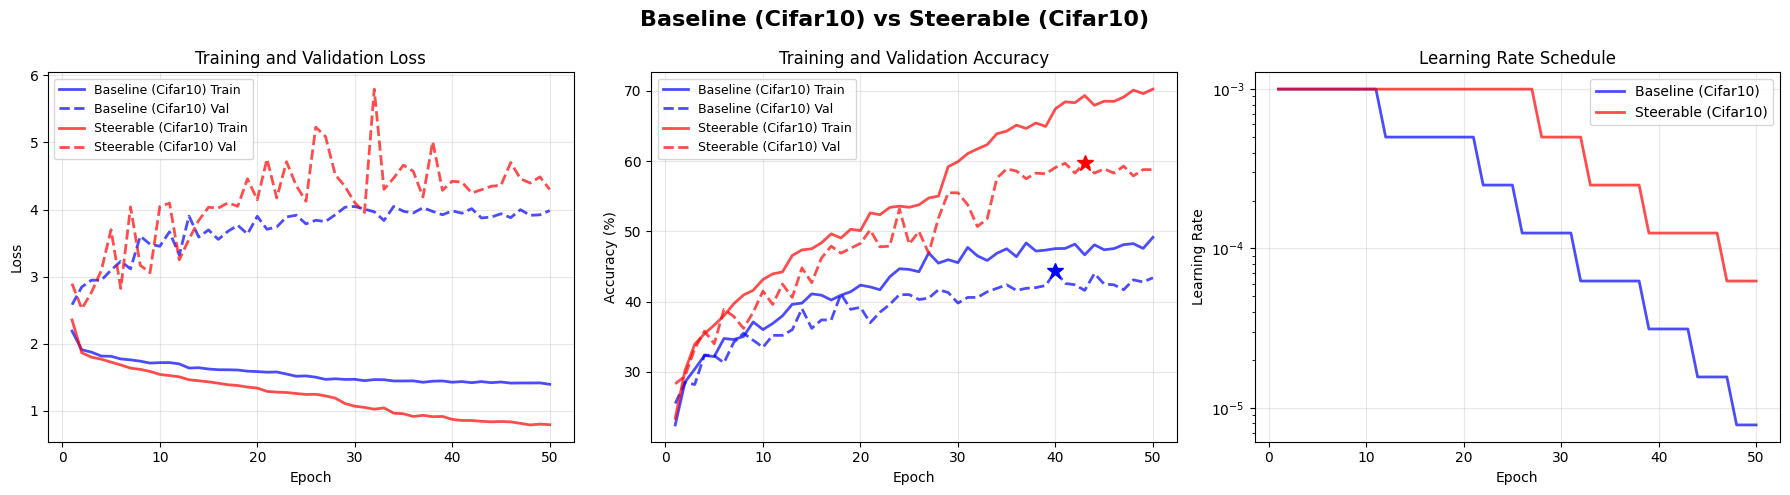

In [16]:
# Evaluate the model and visulize the result for Cifar10

baseline_cifar = SimpleBaselineCNN(num_classes=10).to(Config.device)
checkpoint = torch.load("checkpoints/baseline_cifar.pth", map_location='cpu', weights_only=False)
baseline_cifar.load_state_dict(checkpoint['model_state_dict'])
baseline_cifar_history = checkpoint['history']

steerable_cifar = SimpleSteerableCNN(num_classes=10, N=8).to(Config.device)
checkpoint = torch.load("checkpoints/steerable_cifar.pth", map_location='cpu', weights_only=False)
steerable_cifar.load_state_dict(checkpoint['model_state_dict'])
steerable_cifar_history = checkpoint['history']

print("✅ KTH models loaded")

# Cross-dataset evaluation

print("\n📊 Baseline (trained on KTH)")
baseline_cifar_cross = cross_dataset_evaluation_single_trained(baseline_cifar, 'cifar', Config)

print("\n📊 Steerable (trained on KTH)")
steerable_cifar_cross = cross_dataset_evaluation_single_trained(steerable_cifar, 'cifar', Config)

# Visualize comparison (using DTD test accuracy)
compare_two_models(
    history1=baseline_cifar_history,
    history2=steerable_cifar_history,
    name1='Baseline (Cifar10)',
    name2='Steerable (Cifar10)',
    test_acc1=baseline_cifar_cross['cifar10']['accuracy'],
    test_acc2=steerable_cifar_cross['cifar10']['accuracy'],
    save_name='dtd_baseline_vs_steerable.png'
)